In [49]:
from numpy import linalg as LA
import os
import pandas as pd
import numpy as np
from scipy.signal import find_peaks_cwt
import pickle
from pathlib import Path
from scipy.stats import kurtosis, skew
from scipy.stats import iqr
from pyentrp import entropy as ent
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM, LSTMCell
from keras.layers import Dropout
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import precision_score, recall_score, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import normalize
import sys
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing
import matplotlib.pyplot as plt
import math
from tony_beltramelli_detect_peaks import detect_peaks
from keras.models import load_model
from keras.callbacks import EarlyStopping
import utilities as ut
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm

%matplotlib inline

## Unzip and copy to test folder

In [39]:
in_dir = "data/Sessions/"
out_dir = "test4/"

ut.recursive_unzip(in_dir)
ut.recursive_copy("accelerometer", in_dir, out_dir)
ut.recursive_copy("gyroscope", in_dir, out_dir)

data/Sessions/14442D49F392D1C_Sun_Feb_25_10-51_2018_PST/data/10_android.sensor.linear_acceleration.data.csv.gz
data/Sessions/14442D49F392D1C_Sun_Feb_25_10-51_2018_PST/data/10_android.sensor.linear_acceleration.data.csv
data/Sessions/14442D49F392D1C_Sun_Feb_25_10-51_2018_PST/data/11_android.sensor.rotation_vector.data.csv.gz
data/Sessions/14442D49F392D1C_Sun_Feb_25_10-51_2018_PST/data/11_android.sensor.rotation_vector.data.csv
data/Sessions/14442D49F392D1C_Sun_Feb_25_10-51_2018_PST/data/17_android.sensor.significant_motion.data.csv.gz
data/Sessions/14442D49F392D1C_Sun_Feb_25_10-51_2018_PST/data/17_android.sensor.significant_motion.data.csv
data/Sessions/14442D49F392D1C_Sun_Feb_25_10-51_2018_PST/data/19_android.sensor.step_counter.data.csv.gz
data/Sessions/14442D49F392D1C_Sun_Feb_25_10-51_2018_PST/data/19_android.sensor.step_counter.data.csv
data/Sessions/14442D49F392D1C_Sun_Feb_25_10-51_2018_PST/data/1_android.sensor.accelerometer.data.csv.gz
data/Sessions/14442D49F392D1C_Sun_Feb_25_10-

Skipping file, remove  data/Sessions/14442D49F392D1C_Wed_Feb_14_22-55_2018_PST/data/11_android.sensor.rotation_vector.data.csv.gz
data/Sessions/14442D49F392D1C_Wed_Feb_14_22-55_2018_PST/data/17_android.sensor.significant_motion.data.csv.gz
data/Sessions/14442D49F392D1C_Wed_Feb_14_22-55_2018_PST/data/17_android.sensor.significant_motion.data.csv
data/Sessions/14442D49F392D1C_Wed_Feb_14_22-55_2018_PST/data/19_android.sensor.step_counter.data.csv.gz
data/Sessions/14442D49F392D1C_Wed_Feb_14_22-55_2018_PST/data/19_android.sensor.step_counter.data.csv
data/Sessions/14442D49F392D1C_Wed_Feb_14_22-55_2018_PST/data/1_android.sensor.accelerometer.data.csv.gz
Skipping file, remove  data/Sessions/14442D49F392D1C_Wed_Feb_14_22-55_2018_PST/data/1_android.sensor.accelerometer.data.csv.gz
data/Sessions/14442D49F392D1C_Wed_Feb_14_22-55_2018_PST/data/2_android.sensor.magnetic_field.data.csv.gz
Skipping file, remove  data/Sessions/14442D49F392D1C_Wed_Feb_14_22-55_2018_PST/data/2_android.sensor.magnetic_fi

data/Sessions/14442D49F392D1C_Wed_Feb_21_21-36_2018_PST/data/19_android.sensor.step_counter.data.csv.gz
data/Sessions/14442D49F392D1C_Wed_Feb_21_21-36_2018_PST/data/19_android.sensor.step_counter.data.csv
data/Sessions/14442D49F392D1C_Wed_Feb_21_21-36_2018_PST/data/1_android.sensor.accelerometer.data.csv.gz
data/Sessions/14442D49F392D1C_Wed_Feb_21_21-36_2018_PST/data/1_android.sensor.accelerometer.data.csv
data/Sessions/14442D49F392D1C_Wed_Feb_21_21-36_2018_PST/data/2_android.sensor.magnetic_field.data.csv.gz
data/Sessions/14442D49F392D1C_Wed_Feb_21_21-36_2018_PST/data/2_android.sensor.magnetic_field.data.csv
data/Sessions/14442D49F392D1C_Wed_Feb_21_21-36_2018_PST/data/3_android.sensor.orientation.data.csv.gz
data/Sessions/14442D49F392D1C_Wed_Feb_21_21-36_2018_PST/data/3_android.sensor.orientation.data.csv
data/Sessions/14442D49F392D1C_Wed_Feb_21_21-36_2018_PST/data/4_android.sensor.gyroscope.data.csv.gz
data/Sessions/14442D49F392D1C_Wed_Feb_21_21-36_2018_PST/data/4_android.sensor.gyro

5_android.sensor.light.data.csv
65539_.data.csv
9_android.sensor.gravity.data.csv
10_android.sensor.linear_acceleration.attr.csv
11_android.sensor.rotation_vector.attr.csv
17_android.sensor.significant_motion.attr.csv
18_android.sensor.step_detector.attr.csv
19_android.sensor.step_counter.attr.csv
1_android.sensor.accelerometer.attr.csv
26_android.sensor.wrist_tilt_gesture.attr.csv
2_android.sensor.magnetic_field.attr.csv
3_android.sensor.orientation.attr.csv
4_android.sensor.gyroscope.attr.csv
5_android.sensor.light.attr.csv
65539_.attr.csv
9_android.sensor.gravity.attr.csv
10_android.sensor.linear_acceleration.data.csv
11_android.sensor.rotation_vector.data.csv
17_android.sensor.significant_motion.data.csv
19_android.sensor.step_counter.data.csv
1_android.sensor.accelerometer.data.csv
2_android.sensor.magnetic_field.data.csv
3_android.sensor.orientation.data.csv
4_android.sensor.gyroscope.data.csv
data/Sessions/14442D49F392D1C_Sun_Feb_25_10-51_2018_PST/data/4_android.sensor.gyroscope

## Utility to compute features for accelerometer only

In [9]:
#Helper Functions

def Signal_magnitude_area(x,y,z):

        sum = 0    
        for i in range(len(x)):
            sum += (abs(x[i]) + abs(y[i]) + abs(z[i]))

        return float(sum)/len(x)


def Power(x):

    power = (LA.norm(x)**2)/ len(x)
    return power


def number_of_peaks(window):
    indexes = find_peaks_cwt(window, np.arange(1, len(window)))
    return len(indexes)


def number_of_peaks2(window):

    print('Detect peaks with height threshold.')
    indexes = detect_peaks(vector, 1.5)
    return len(indexes)


#this function assumes that records are evenly spaced
def trim_first_last_n_seconds(df, n, freq):
    if df.shape[0] < 6001:
        return None

    remove_indexes = list(range(0, int(n*1000/freq)))
    df = df.drop(remove_indexes)

    remove_indexes = list(range(df.shape[0] - int(n*1000/freq), df.shape[0]-1))
    df = df.drop(remove_indexes)

    return df


def compute_accelerometer_features(in_dir, features, labels, trim_num_seconds=10, acc_freq=4, window_num_seconds=4, window_step=2, jump_window=False, ignore_pickle=False):
    
    steps_per_sec = int(1000/acc_freq)
    window_size = int(window_num_seconds*steps_per_sec)
    
    window_jump_steps = 0
    if jump_window:
        window_jump_steps = window_size
    else:
        window_jump_steps = int(window_step*steps_per_sec)

    print("\nWindow_size, Window_jump_steps: ", window_size, window_jump_steps)

    dfs_list = []

    pickle_folder = "pickles/"
    if jump_window:
        features_pickle_file_name = "accerlerometer_" + str(window_num_seconds) + "s_" + "jump" + "_" + "features.pickle"
        labels_pickle_file_name = "accerlerometer_" + str(window_num_seconds) + "s_" + "jump" + "_" + "labels.pickle"
        dfs_list_pickle_file_name = "accerlerometer_" + str(window_num_seconds) + "s_" + "jump" + "_" + "dfs_list.pickle"
    else:
        features_pickle_file_name = "accerlerometer_" + str(window_num_seconds) + "s_" + str(window_step) + "s_" + "features.pickle"
        labels_pickle_file_name = "accerlerometer_" + str(window_num_seconds) + "s_" + str(window_step) + "s_" + "labels.pickle"
        dfs_list_pickle_file_name = "accerlerometer_" + str(window_num_seconds) + "s_" + str(window_step) + "s_" + "dfs_list.pickle"
    
    if not ignore_pickle:
        print("\nTrying to find ", pickle_folder + features_pickle_file_name)
        
    pickle_file = Path(pickle_folder + features_pickle_file_name)

    if pickle_file.exists() and not ignore_pickle:
        print("\n\nFound pickle files for accelerometer\n\n")

        features = pickle.load(open(pickle_folder + features_pickle_file_name, "rb"))
        labels = pickle.load(open(pickle_folder + labels_pickle_file_name, "rb"))
        dfs_list = pickle.load(open(pickle_folder + dfs_list_pickle_file_name, "rb"))

    else:

        for root, dirs, files in os.walk(in_dir):
            path = root.split(os.sep)

            for f in files:
                print("\n")
                print("/".join(path) + "/" + f)

                full_path = "/".join(path) + "/" + f

                if "gyroscope" in full_path:
                    print("Skip ", full_path)
                    continue

                df = pd.read_csv(full_path, header=None)

                print("Before trimming: ", df.shape)

                df = trim_first_last_n_seconds(df, trim_num_seconds, acc_freq)
                if df is None:
                    print("Continuing")
                    continue

                print("After trimming: ", df.shape)

                #Sample the data according to the size of the window with 50% overlap
                for index in range(0, df.shape[0]-window_size, window_jump_steps):
                    indexes = list(range(index, index + int(window_size)))

                    window = df.iloc[indexes,:]

                    X_list = window[1].tolist()
                    Y_list = window[2].tolist()
                    Z_list = window[3].tolist()


                    #Generate the features for this window


           # ****************** Time-Domain Features ************************* #

                    #Mean of the signals
                    mean_x = np.mean(X_list)
                    mean_y = np.mean(Y_list)
                    mean_z = np.mean(Z_list)

                    #Variance of the signals
                    var_x = np.var(X_list)
                    var_y = np.var(Y_list)
                    var_z = np.var(Z_list)

                    #Number of peaks in the signals
                    #num_peaks_x = number_of_peaks(X_list)
                    #num_peaks_y = number_of_peaks(Y_list)
                    #num_peaks_z = number_of_peaks(Z_list)            

                    #Median of the signals
                    median_x = np.ma.median(X_list)
                    median_y = np.ma.median(Y_list)
                    median_z = np.ma.median(Z_list)

                    #Standard Deviation of the signals
                    std_x = np.std(X_list)
                    std_y = np.std(Y_list)
                    std_z = np.std(Z_list)

                    #Compute Signal Magnitude Area
                    signal_mag_area = Signal_magnitude_area(X_list, Y_list, Z_list)

                    #Maximum and Minimum values and their indexes
                    max_x = max(X_list)
                    #max_index_x = X_list.index(max_x)               
                    min_x = min(X_list)
                    #min_index_x = X_list.index(min_x)

                    max_y = max(Y_list)
                   #max_index_y = Y_list.index(max_y)              
                    min_y = min(Y_list)
                    #min_index_y = Y_list.index(min_y)               

                    max_z = max(Z_list)
                    #max_index_z = Z_list.index(max_z)             
                    min_z = min(Z_list)
                    #min_index_z = Z_list.index(min_z)


                    #Power of X,Y and Z signals             
                    power_x = Power(X_list)
                    power_y = Power(Y_list)
                    power_z = Power(Z_list)


                    #Skewness and Kurtosis
                    skew_x = skew(X_list)
                    skew_y = skew(Y_list)
                    skew_z = skew(Z_list)

                    kurtosis_x = kurtosis(X_list)                
                    kurtosis_y = kurtosis(Y_list)
                    kurtosis_z = kurtosis(Z_list)


                    #Entropy of the signals (Can experiment with different types of Entropy)
                    entropy_x = ent.shannon_entropy(X_list)
                    entropy_y = ent.shannon_entropy(Y_list)
                    entropy_z = ent.shannon_entropy(Z_list)


                    #Interquartile range of the signals
                    iqr_x = iqr(X_list)
                    iqr_y = iqr(Y_list)
                    iqr_z = iqr(Z_list)


                    #Cross Correlation 
                    corr_x_y = np.correlate(X_list, Y_list)[0]
                    corr_y_z = np.correlate(Y_list, Z_list)[0]
                    corr_x_z = np.correlate(X_list, Z_list)[0]


                    
                    #Pitch and Roll Information (for rotation)
                    roll = []
                    pitch = []
                    for index in range(0,len(X_list)):                       
                        roll.append(math.atan2(Y_list[index]/9.81, Z_list[index]/9.81) * 57.3)
                        pitch.append(math.atan2(X_list[index]/9.81, Z_list[index]/9.81) * 57.3)
                    
                    #Mean of the roll and pitch
                    mean_roll = np.mean(roll)
                    mean_pitch = np.mean(pitch)
                    
                    #RMS of roll and pitch
                    #rms_roll = np.sqrt(np.mean(roll**2))
                    rms_roll = np.sqrt(np.mean([x**2 for x in roll]))
                    rms_pitch = np.sqrt(np.mean([x**2 for x in pitch]))            
                    #rms_pitch = np.sqrt(np.mean(pitch**2))
                                      
                    #Zero Crossing Rate for roll and pitch
                    frame = roll
                    count = len(frame)
                    countZ = np.sum(np.abs(np.diff(np.sign(frame)))) / 2
                    zcr_roll = np.float64(countZ) / np.float64(count-1.0)
                    
                    frame = pitch
                    count = len(frame)
                    countZ = np.sum(np.abs(np.diff(np.sign(frame)))) / 2
                    zcr_pitch = np.float64(countZ) / np.float64(count-1.0)
                    

        # ****************** Frequency-Domain Features ************************* #


                    coeff_X = np.fft.fft(X_list)
                    coeff_Y = np.fft.fft(Y_list)
                    coeff_Z = np.fft.fft(Z_list)


                    #Normalized FFT coefficients
                    fft_x = LA.norm(coeff_X)              
                    fft_y = LA.norm(coeff_Y)   
                    fft_z = LA.norm(coeff_Z)  


                    #Energy in the frequency Domain
                    Energy_x = sum(abs(coeff_X**2))/len(X_list)
                    #sum(abs(coeff_X)**2)/len(x1)
                    Energy_y = sum(abs(coeff_Y**2))/len(Y_list)
                    Energy_z = sum(abs(coeff_Z**2))/len(Z_list)


                    #Store the features
                    window_feature = []
                    window_feature.append(mean_x)
                    window_feature.append(mean_y)
                    window_feature.append(mean_z)

                    window_feature.append(var_x)
                    window_feature.append(var_y)
                    window_feature.append(var_z)

                    window_feature.append(median_x)
                    window_feature.append(median_y)
                    window_feature.append(median_z)

                    window_feature.append(std_x)
                    window_feature.append(std_y)
                    window_feature.append(std_z)


                    window_feature.append(signal_mag_area)

                    window_feature.append(max_x)
                    #window_feature.append(max_index_x)
                    window_feature.append(min_x)
                    #window_feature.append(min_index_x)

                    window_feature.append(max_y)
                    #window_feature.append(max_index_y)
                    window_feature.append(min_y)
                    #window_feature.append(min_index_y)

                    window_feature.append(max_z)
                    #window_feature.append(max_index_z)
                    window_feature.append(min_z)
                    #window_feature.append(min_index_z)

                    window_feature.append(power_x)
                    window_feature.append(power_y)
                    window_feature.append(power_z)

                    window_feature.append(skew_x)
                    window_feature.append(kurtosis_x) 

                    window_feature.append(skew_y)
                    window_feature.append(kurtosis_y) 

                    window_feature.append(skew_z)
                    window_feature.append(kurtosis_z) 

                    window_feature.append(entropy_x)
                    window_feature.append(entropy_y)
                    window_feature.append(entropy_z)

                    window_feature.append(iqr_x)
                    window_feature.append(iqr_y)
                    window_feature.append(iqr_z)

                    window_feature.append(corr_x_y)
                    window_feature.append(corr_y_z)
                    window_feature.append(corr_x_z)
                    
                    window_feature.append(mean_roll)
                    window_feature.append(mean_pitch)
                    window_feature.append(rms_roll)
                    window_feature.append(rms_pitch)
                    
                    window_feature.append(zcr_roll)
                    window_feature.append(zcr_pitch)

                    window_feature.append(fft_x)
                    window_feature.append(fft_y)
                    window_feature.append(fft_z)

                    window_feature.append(Energy_x)
                    window_feature.append(Energy_y)
                    window_feature.append(Energy_z)

                    #window_feature.append(num_peaks_x)
                    #window_feature.append(num_peaks_y)
                    #window_feature.append(num_peaks_z)

                    #scale = preprocessing.minmax_scale(data, feature_range=(-0.5, 0.5))

                    features.append(window_feature)

                    #Store the label
                    labels.append(df[5].iloc[1])

                dfs_list.append(df)

        dfs = pd.concat(dfs_list)

        if not ignore_pickle:

            pickle.dump(features, open(pickle_folder + features_pickle_file_name, "wb"), protocol=2)
            pickle.dump(labels, open(pickle_folder + labels_pickle_file_name, "wb"), protocol=2)
            pickle.dump(dfs_list, open(pickle_folder + dfs_list_pickle_file_name, "wb"), protocol=2)

    features = np.asarray(features)
    labels = np.asarray(labels)
    
    return features, labels

## Compute features for accelerometer - train/test, sliding window 50% overlap

In [48]:
train = True
test = True

test_dir = 'test4'
train_dir = 'data_3_8_2018'


if train:
    print("\nComputing train features")
    features = []
    labels = []
    features, labels = compute_accelerometer_features(train_dir, features, labels, trim_num_seconds=10, acc_freq=4, window_num_seconds=4, window_step=2, jump_window=False, ignore_pickle=False)
    
if test:
    print("\nComputing test features")
    test_features = []
    test_labels = []
    test_features, test_labels = compute_accelerometer_features(test_dir, test_features, test_labels, trim_num_seconds=10, acc_freq=4, window_num_seconds=4, window_step=2, jump_window=False, ignore_pickle=True)

print("\n\nShapes of train and test features:")
print(features.shape)
print(test_features.shape)


Computing train features

Window_size, Window_jump_steps:  1000 500

Trying to find  pickles/accerlerometer_4s_2s_features.pickle


Found pickle files for accelerometer



Computing test features

Window_size, Window_jump_steps:  1000 500


test4/0_1_android.sensor.accelerometer.data.csv
Before trimming:  (209320, 6)
After trimming:  (204321, 6)


test4/0_4_android.sensor.gyroscope.data.csv
Skip  test4/0_4_android.sensor.gyroscope.data.csv


test4/1_1_android.sensor.accelerometer.data.csv
Before trimming:  (243545, 6)
After trimming:  (238546, 6)


test4/1_4_android.sensor.gyroscope.data.csv
Skip  test4/1_4_android.sensor.gyroscope.data.csv


test4/2_1_android.sensor.accelerometer.data.csv
Before trimming:  (231876, 6)
After trimming:  (226877, 6)


test4/2_4_android.sensor.gyroscope.data.csv
Skip  test4/2_4_android.sensor.gyroscope.data.csv


test4/3_1_android.sensor.accelerometer.data.csv
Before trimming:  (128881, 6)
After trimming:  (123882, 6)


test4/3_4_android.sensor.gyroscope

## Compute features for accelerometer - train/test, jumping window

In [11]:
train = True
test = True

test_dir = 'test3'
train_dir = 'data_3_8_2018'

if train:
    print("\nComputing train features")
    features = []
    labels = []
    features, labels = compute_accelerometer_features(train_dir, features, labels, trim_num_seconds=10, acc_freq=4, window_num_seconds=4, window_step=2, jump_window=True, ignore_pickle=False)
    
if test:
    print("\nComputing test features")
    test_features = []
    test_labels = []
    test_features, test_labels = compute_accelerometer_features(test_dir, test_features, test_labels, trim_num_seconds=10, acc_freq=4, window_num_seconds=4, window_step=2, jump_window=True, ignore_pickle=True)

print("\n\nShapes of train and test features:")
print(features.shape)
print(test_features.shape)


Computing train features

Window_size, Window_jump_steps:  2000 2000

Trying to find  pickles/accerlerometer_8s_jump_features.pickle


data_3_8_2018/0_1_android.sensor.accelerometer.data.csv
Before trimming:  (40642, 6)
After trimming:  (35643, 6)


data_3_8_2018/0_4_android.sensor.gyroscope.data.csv
Skip  data_3_8_2018/0_4_android.sensor.gyroscope.data.csv


data_3_8_2018/10_1_android.sensor.accelerometer.data.csv
Before trimming:  (137412, 6)
After trimming:  (132413, 6)


data_3_8_2018/10_4_android.sensor.gyroscope.data.csv
Skip  data_3_8_2018/10_4_android.sensor.gyroscope.data.csv


data_3_8_2018/11_1_android.sensor.accelerometer.data.csv
Before trimming:  (100066, 6)
After trimming:  (95067, 6)


data_3_8_2018/11_4_android.sensor.gyroscope.data.csv
Skip  data_3_8_2018/11_4_android.sensor.gyroscope.data.csv


data_3_8_2018/12_1_android.sensor.accelerometer.data.csv
Before trimming:  (64964, 6)
After trimming:  (59965, 6)


data_3_8_2018/12_4_android.sensor.gyroscope.data.csv
Skip 



data_3_8_2018/41_4_android.sensor.gyroscope.data.csv
Skip  data_3_8_2018/41_4_android.sensor.gyroscope.data.csv


data_3_8_2018/42_1_android.sensor.accelerometer.data.csv
Before trimming:  (40200, 6)
After trimming:  (35201, 6)


data_3_8_2018/42_4_android.sensor.gyroscope.data.csv
Skip  data_3_8_2018/42_4_android.sensor.gyroscope.data.csv


data_3_8_2018/43_1_android.sensor.accelerometer.data.csv
Before trimming:  (118805, 6)
After trimming:  (113806, 6)


data_3_8_2018/43_4_android.sensor.gyroscope.data.csv
Skip  data_3_8_2018/43_4_android.sensor.gyroscope.data.csv


data_3_8_2018/44_1_android.sensor.accelerometer.data.csv
Before trimming:  (65634, 6)
After trimming:  (60635, 6)


data_3_8_2018/44_4_android.sensor.gyroscope.data.csv
Skip  data_3_8_2018/44_4_android.sensor.gyroscope.data.csv


data_3_8_2018/45_1_android.sensor.accelerometer.data.csv
Before trimming:  (98968, 6)
After trimming:  (93969, 6)


data_3_8_2018/45_4_android.sensor.gyroscope.data.csv
Skip  data_3_8_2018/45_



test3/0_4_android.sensor.gyroscope.data.csv
Skip  test3/0_4_android.sensor.gyroscope.data.csv


test3/10_1_android.sensor.accelerometer.data.csv
Before trimming:  (60055, 6)
After trimming:  (55056, 6)


test3/10_4_android.sensor.gyroscope.data.csv
Skip  test3/10_4_android.sensor.gyroscope.data.csv


test3/11_1_android.sensor.accelerometer.data.csv
Before trimming:  (49816, 6)
After trimming:  (44817, 6)


test3/11_4_android.sensor.gyroscope.data.csv
Skip  test3/11_4_android.sensor.gyroscope.data.csv


test3/12_1_android.sensor.accelerometer.data.csv
Before trimming:  (60027, 6)
After trimming:  (55028, 6)


test3/12_4_android.sensor.gyroscope.data.csv
Skip  test3/12_4_android.sensor.gyroscope.data.csv


test3/13_1_android.sensor.accelerometer.data.csv
Before trimming:  (56395, 6)
After trimming:  (51396, 6)


test3/13_4_android.sensor.gyroscope.data.csv
Skip  test3/13_4_android.sensor.gyroscope.data.csv


test3/14_1_android.sensor.accelerometer.data.csv
Before trimming:  (60088, 6)


## Plot labels to check distribution of classes

['laying_down' 'sitting' 'standing' 'walking']


(array([3004.,    0.,    0., 2842.,    0.,    0., 2738.,    0.,    0.,
        3148.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <a list of 10 Patch objects>)

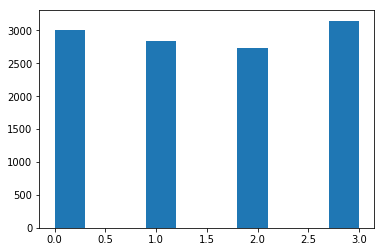

In [50]:
le = preprocessing.LabelEncoder()
y = le.fit_transform(labels)

print(le.classes_)

plt.hist(y)

['laying_down' 'sitting' 'standing' 'walking']


(array([928.,   0.,   0., 246.,   0.,   0., 803.,   0.,   0., 362.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <a list of 10 Patch objects>)

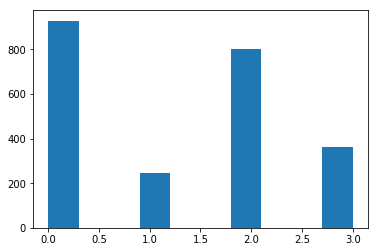

In [24]:
le = preprocessing.LabelEncoder()
y = le.fit_transform(test_labels)

print(le.classes_)

plt.hist(y)

# Compute features for accelerometer and gyrometer

In [16]:
#this function assumes that records are evenly spaced
def trim_first_last_n_seconds(df, n, freq):
    if df.shape[0] < 6001:
        return None
    
    remove_indexes = list(range(0, int(n*1000/freq)))
    df = df.drop(remove_indexes)

    remove_indexes = list(range(df.shape[0] - int(n*1000/freq), df.shape[0]-1))
    df = df.drop(remove_indexes)
    
    return df
    
def combine_acc_gyro_data(df_acc, df_gyro):
    threshold = 10
    
    acc_index = 0
    gyro_index = 0
    
    acc_matrix = df_acc.as_matrix()
    gyro_matrix = df_gyro.as_matrix()
    
    combined_list = []
    
    while (acc_index < df_acc.shape[0]) and (gyro_index < df_gyro.shape[0]):
        #find next gyro_index within threshold and append the data
        
        acc_time = df_acc.iloc[acc_index][0]
        gyro_time = df_gyro.iloc[gyro_index][0]

        if (acc_time < gyro_time):
            while (acc_index < df_acc.shape[0]) and (gyro_time - acc_time > threshold):
                acc_time = acc_matrix[acc_index][0] #df_acc.iloc[acc_index][0]
                acc_index += 1
        else:
            while (gyro_index < df_gyro.shape[0]) and (acc_time - gyro_time > threshold):
                gyro_time = gyro_matrix[gyro_index][0] #df_gyro.iloc[gyro_index][0]
                gyro_index += 1
        
        if (acc_index < df_acc.shape[0]) and (gyro_index < df_gyro.shape[0]):
            combined_list.append(np.concatenate((acc_matrix[acc_index][:4], gyro_matrix[gyro_index][1:6]), axis=0))
            
        acc_index += 1
        gyro_index += 1
            
    return combined_list

def compute_acc_gyro_features(in_dir, features, labels, trim_num_seconds=10, acc_freq=4, window_num_seconds=4, window_step=2, jump_window=False, ignore_pickle=False):
    
    steps_per_sec = int(1000/acc_freq)
    window_size = int(window_num_seconds*steps_per_sec)
    
    window_jump_steps = 0
    if jump_window:
        window_jump_steps = window_size
    else:
        window_jump_steps = int(window_step*steps_per_sec)

    print("\nWindow_size, Window_jump_steps: ", window_size, window_jump_steps)

    dfs_list = []

    pickle_folder = "pickles/"
    if jump_window:
        features_pickle_file_name = "acc_gyro_" + str(window_num_seconds) + "s_" + "jump" + "_" + "features.pickle"
        labels_pickle_file_name = "acc_gyro_" + str(window_num_seconds) + "s_" + "jump" + "_" + "labels.pickle"
        dfs_list_pickle_file_name = "acc_gyro_" + str(window_num_seconds) + "s_" + "jump" + "_" + "dfs_list.pickle"
    else:
        features_pickle_file_name = "acc_gyro_" + str(window_num_seconds) + "s_" + str(window_step) + "s_" + "features.pickle"
        labels_pickle_file_name = "acc_gyro_" + str(window_num_seconds) + "s_" + str(window_step) + "s_" + "labels.pickle"
        dfs_list_pickle_file_name = "acc_gyro_" + str(window_num_seconds) + "s_" + str(window_step) + "s_" + "dfs_list.pickle"
    
    if not ignore_pickle:
        print("\nTrying to find ", pickle_folder + features_pickle_file_name)
        
    pickle_file = Path(pickle_folder + features_pickle_file_name)

    if pickle_file.exists() and not ignore_pickle:
        print("\n\nFound pickle files for accelerometer\n\n")

        features = pickle.load(open(pickle_folder + features_pickle_file_name, "rb"))
        labels = pickle.load(open(pickle_folder + labels_pickle_file_name, "rb"))
        dfs_list = pickle.load(open(pickle_folder + dfs_list_pickle_file_name, "rb"))

    else:
        
        dfs_list = []

        for root, dirs, files in os.walk(in_dir):
            path = root.split(os.sep)

            for f in files:

                if 'accelerometer' in f:
                    accelerometer_path = "/".join(path) + "/" + f
                    print(accelerometer_path)

                    first_ = f.find("_")
                    g = f[0:first_] + "_4" + f[first_+2:]
                    gyroscope_path = "/".join(path) + "/" + g.replace("accelerometer","gyroscope")
                    print(gyroscope_path)

                    df_acc = pd.read_csv(accelerometer_path, header=None)
                    df_gyro = pd.read_csv(gyroscope_path, header=None)

                    combined_list = combine_acc_gyro_data(df_acc, df_gyro)
                    combined_numpy = np.array(combined_list)

                    combined_df = pd.DataFrame(data=combined_numpy)

                    print("Before trimming: ", combined_df.shape)

                    combined_df = trim_first_last_n_seconds(combined_df, trim_num_seconds, acc_freq)
                    if combined_df is None:
                        print("Continuing")
                        continue

                    print("After trimming: ", combined_df.shape)

                    #Sample the data according to the size of the window with 50% overlap
                    for index in range(0, combined_df.shape[0]-window_size, window_jump_steps):
                        indexes = list(range(index, index + int(window_size)))

                        window = combined_df.iloc[indexes,:]
                        X_list = window[1].tolist()
                        Y_list = window[2].tolist()
                        Z_list = window[3].tolist()

                        
                        window_feature = []
                        
               # ****************** Time-Domain Features ************************* #

                        #Mean of the signals
                        mean_x = np.mean(X_list)
                        mean_y = np.mean(Y_list)
                        mean_z = np.mean(Z_list)

                        #Variance of the signals
                        var_x = np.var(X_list)
                        var_y = np.var(Y_list)
                        var_z = np.var(Z_list)

                        #Median of the signals
                        median_x = np.ma.median(X_list)
                        median_y = np.ma.median(Y_list)
                        median_z = np.ma.median(Z_list)

                        #Standard Deviation of the signals
                        std_x = np.std(X_list)
                        std_y = np.std(Y_list)
                        std_z = np.std(Z_list)

                        #Compute Signal Magnitude Area
                        signal_mag_area = Signal_magnitude_area(X_list, Y_list, Z_list)

                        #Maximum and Minimum values and their indexes
                        max_x = max(X_list)
                        min_x = min(X_list)

                        max_y = max(Y_list)
                        min_y = min(Y_list)

                        max_z = max(Z_list)
                        min_z = min(Z_list)


                        #Power of X,Y and Z signals             
                        power_x = Power(X_list)
                        power_y = Power(Y_list)
                        power_z = Power(Z_list)


                        #Skewness and Kurtosis
                        skew_x = skew(X_list)
                        skew_y = skew(Y_list)
                        skew_z = skew(Z_list)

                        kurtosis_x = kurtosis(X_list)                
                        kurtosis_y = kurtosis(Y_list)
                        kurtosis_z = kurtosis(Z_list)


                        #Entropy of the signals (Can experiment with different types of Entropy)
                        entropy_x = ent.shannon_entropy(X_list)
                        entropy_y = ent.shannon_entropy(Y_list)
                        entropy_z = ent.shannon_entropy(Z_list)


                        #Interquartile range of the signals
                        iqr_x = iqr(X_list)
                        iqr_y = iqr(Y_list)
                        iqr_z = iqr(Z_list)


                        #Cross Correlation 
                        corr_x_y = np.correlate(X_list, Y_list)[0]
                        corr_y_z = np.correlate(Y_list, Z_list)[0]
                        corr_x_z = np.correlate(X_list, Z_list)[0]



                        #Pitch and Roll Information (for rotation)
                        roll = []
                        pitch = []
                        for index in range(0,len(X_list)):                       
                            roll.append(math.atan2(Y_list[index]/9.81, Z_list[index]/9.81) * 57.3)
                            pitch.append(math.atan2(X_list[index]/9.81, Z_list[index]/9.81) * 57.3)

                        #Mean of the roll and pitch
                        mean_roll = np.mean(roll)
                        mean_pitch = np.mean(pitch)

                        #RMS of roll and pitch
                        rms_roll = np.sqrt(np.mean([x**2 for x in roll]))
                        rms_pitch = np.sqrt(np.mean([x**2 for x in pitch]))            

                        #Zero Crossing Rate for roll and pitch
                        frame = roll
                        count = len(frame)
                        countZ = np.sum(np.abs(np.diff(np.sign(frame)))) / 2
                        zcr_roll = np.float64(countZ) / np.float64(count-1.0)

                        frame = pitch
                        count = len(frame)
                        countZ = np.sum(np.abs(np.diff(np.sign(frame)))) / 2
                        zcr_pitch = np.float64(countZ) / np.float64(count-1.0)


            # ****************** Frequency-Domain Features ************************* #


                        coeff_X = np.fft.fft(X_list)
                        coeff_Y = np.fft.fft(Y_list)
                        coeff_Z = np.fft.fft(Z_list)


                        #Normalized FFT coefficients
                        fft_x = LA.norm(coeff_X)              
                        fft_y = LA.norm(coeff_Y)   
                        fft_z = LA.norm(coeff_Z)  


                        #Energy in the frequency Domain
                        Energy_x = sum(abs(coeff_X**2))/len(X_list)
                        Energy_y = sum(abs(coeff_Y**2))/len(Y_list)
                        Energy_z = sum(abs(coeff_Z**2))/len(Z_list)


                        #Store the features
                        window_feature.append(mean_x)
                        window_feature.append(mean_y)
                        window_feature.append(mean_z)

                        window_feature.append(var_x)
                        window_feature.append(var_y)
                        window_feature.append(var_z)

                        window_feature.append(median_x)
                        window_feature.append(median_y)
                        window_feature.append(median_z)

                        window_feature.append(std_x)
                        window_feature.append(std_y)
                        window_feature.append(std_z)


                        window_feature.append(signal_mag_area)

                        window_feature.append(max_x)
                        window_feature.append(min_x)

                        window_feature.append(max_y)
                        window_feature.append(min_y)

                        window_feature.append(max_z)
                        window_feature.append(min_z)

                        window_feature.append(power_x)
                        window_feature.append(power_y)
                        window_feature.append(power_z)

                        window_feature.append(skew_x)
                        window_feature.append(kurtosis_x) 

                        window_feature.append(skew_y)
                        window_feature.append(kurtosis_y) 

                        window_feature.append(skew_z)
                        window_feature.append(kurtosis_z) 

                        window_feature.append(entropy_x)
                        window_feature.append(entropy_y)
                        window_feature.append(entropy_z)

                        window_feature.append(iqr_x)
                        window_feature.append(iqr_y)
                        window_feature.append(iqr_z)

                        window_feature.append(corr_x_y)
                        window_feature.append(corr_y_z)
                        window_feature.append(corr_x_z)

                        window_feature.append(mean_roll)
                        window_feature.append(mean_pitch)
                        window_feature.append(rms_roll)
                        window_feature.append(rms_pitch)

                        window_feature.append(zcr_roll)
                        window_feature.append(zcr_pitch)

                        window_feature.append(fft_x)
                        window_feature.append(fft_y)
                        window_feature.append(fft_z)

                        window_feature.append(Energy_x)
                        window_feature.append(Energy_y)
                        window_feature.append(Energy_z)


            # ****************** Gyroscope Features ************************* #

                        X_list = window[4].tolist()
                        Y_list = window[5].tolist()
                        Z_list = window[6].tolist()

                        
                        gyro_mean_x = np.mean(X_list)
                        gyro_mean_y = np.mean(Y_list)
                        gyro_mean_z = np.mean(Z_list)

                        gyro_var_x = np.var(X_list)
                        gyro_var_y = np.var(Y_list)
                        gyro_var_z = np.var(Z_list)

                        #Median of the signals
                        gyro_median_x = np.ma.median(X_list)
                        gyro_median_y = np.ma.median(Y_list)
                        gyro_median_z = np.ma.median(Z_list)

                        #Standard Deviation of the signals
                        gyro_std_x = np.std(X_list)
                        gyro_std_y = np.std(Y_list)
                        gyro_std_z = np.std(Z_list)

                        #Maximum and Minimum values and their indexes
                        gyro_max_x = max(X_list)
                        gyro_min_x = min(X_list)

                        gyro_max_y = max(Y_list)
                        gyro_min_y = min(Y_list)

                        gyro_max_z = max(Z_list)
                        gyro_min_z = min(Z_list)
                        
                        #Store the features

                        window_feature.append(gyro_mean_x)
                        window_feature.append(gyro_mean_y)
                        window_feature.append(gyro_mean_z)
                        window_feature.append(gyro_var_x)
                        window_feature.append(gyro_var_y)
                        window_feature.append(gyro_var_z)
                        window_feature.append(gyro_median_x)
                        window_feature.append(gyro_median_y)
                        window_feature.append(gyro_median_z)
                        window_feature.append(gyro_std_x)
                        window_feature.append(gyro_std_y)
                        window_feature.append(gyro_std_z)
                        window_feature.append(gyro_max_x)
                        window_feature.append(gyro_max_y)
                        window_feature.append(gyro_max_z)
                        window_feature.append(gyro_min_x)
                        window_feature.append(gyro_min_y)
                        window_feature.append(gyro_min_z)
                        

                        features.append(window_feature)

                        #Store the label
                        labels.append(combined_df[8].iloc[0])

                    dfs_list.append(combined_df)

        dfs = pd.concat(dfs_list)

        pickle.dump(features, open(pickle_folder + features_pickle_file_name, "wb"), protocol=2)
        pickle.dump(labels, open(pickle_folder + labels_pickle_file_name, "wb"), protocol=2)
        pickle.dump(dfs_list, open(pickle_folder + dfs_list_pickle_file_name, "wb"), protocol=2)

    features = np.asarray(features)
    labels = np.asarray(labels)
    
    return features, labels

## Compute features for accelerometer/gyroscope - train/test, sliding window 50% overlap

In [17]:
train = True
test = True

test_dir = 'test3'
train_dir = 'data_3_8_2018'


if train:
    print("\nComputing train features")
    features = []
    labels = []
    features, labels = compute_acc_gyro_features(train_dir, features, labels, trim_num_seconds=10, acc_freq=4, window_num_seconds=4, window_step=2, jump_window=False, ignore_pickle=False)
    
if test:
    print("\nComputing test features")
    test_features = []
    test_labels = []
    test_features, test_labels = compute_acc_gyro_features(test_dir, test_features, test_labels, trim_num_seconds=10, acc_freq=4, window_num_seconds=4, window_step=2, jump_window=False, ignore_pickle=True)

print("\n\nShapes of train and test features:")
print(features.shape)
print(test_features.shape)


Computing train features

Window_size, Window_jump_steps:  1000 500

Trying to find  pickles/acc_gyro_4s_2s_features.pickle
data_3_8_2018/0_1_android.sensor.accelerometer.data.csv
data_3_8_2018/0_4_android.sensor.gyroscope.data.csv
Before trimming:  (20562, 9)
After trimming:  (15563, 9)
data_3_8_2018/10_1_android.sensor.accelerometer.data.csv
data_3_8_2018/10_4_android.sensor.gyroscope.data.csv
Before trimming:  (104000, 9)
After trimming:  (99001, 9)
data_3_8_2018/11_1_android.sensor.accelerometer.data.csv
data_3_8_2018/11_4_android.sensor.gyroscope.data.csv
Before trimming:  (47908, 9)
After trimming:  (42909, 9)
data_3_8_2018/12_1_android.sensor.accelerometer.data.csv
data_3_8_2018/12_4_android.sensor.gyroscope.data.csv
Before trimming:  (34142, 9)
After trimming:  (29143, 9)
data_3_8_2018/13_1_android.sensor.accelerometer.data.csv
data_3_8_2018/13_4_android.sensor.gyroscope.data.csv
Before trimming:  (50014, 9)
After trimming:  (45015, 9)
data_3_8_2018/14_1_android.sensor.acceler

Before trimming:  (41480, 9)
After trimming:  (36481, 9)
data_3_8_2018/54_1_android.sensor.accelerometer.data.csv
data_3_8_2018/54_4_android.sensor.gyroscope.data.csv
Before trimming:  (24216, 9)
After trimming:  (19217, 9)
data_3_8_2018/55_1_android.sensor.accelerometer.data.csv
data_3_8_2018/55_4_android.sensor.gyroscope.data.csv
Before trimming:  (28194, 9)
After trimming:  (23195, 9)
data_3_8_2018/56_1_android.sensor.accelerometer.data.csv
data_3_8_2018/56_4_android.sensor.gyroscope.data.csv
Before trimming:  (65843, 9)
After trimming:  (60844, 9)
data_3_8_2018/57_1_android.sensor.accelerometer.data.csv
data_3_8_2018/57_4_android.sensor.gyroscope.data.csv
Before trimming:  (52503, 9)
After trimming:  (47504, 9)
data_3_8_2018/58_1_android.sensor.accelerometer.data.csv
data_3_8_2018/58_4_android.sensor.gyroscope.data.csv
Before trimming:  (3949, 9)
Continuing
data_3_8_2018/59_1_android.sensor.accelerometer.data.csv
data_3_8_2018/59_4_android.sensor.gyroscope.data.csv
Before trimming:

## Compute features for accelerometer/gyroscope - train/test, jumping window

In [18]:
train = True
test = True

test_dir = 'test3'
train_dir = 'data_3_8_2018'

if train:
    print("\nComputing train features")
    features = []
    labels = []
    features, labels = compute_acc_gyro_features(train_dir, features, labels, trim_num_seconds=10, acc_freq=4, window_num_seconds=4, window_step=2, jump_window=True, ignore_pickle=False)
    
if test:
    print("\nComputing test features")
    test_features = []
    test_labels = []
    test_features, test_labels = compute_acc_gyro_features(test_dir, test_features, test_labels, trim_num_seconds=10, acc_freq=4, window_num_seconds=4, window_step=2, jump_window=True, ignore_pickle=True)

print("\n\nShapes of train and test features:")
print(features.shape)
print(test_features.shape)


Computing train features

Window_size, Window_jump_steps:  1000 1000

Trying to find  pickles/acc_gyro_4s_jump_features.pickle
data_3_8_2018/0_1_android.sensor.accelerometer.data.csv
data_3_8_2018/0_4_android.sensor.gyroscope.data.csv
Before trimming:  (20562, 9)
After trimming:  (15563, 9)
data_3_8_2018/10_1_android.sensor.accelerometer.data.csv
data_3_8_2018/10_4_android.sensor.gyroscope.data.csv
Before trimming:  (104000, 9)
After trimming:  (99001, 9)
data_3_8_2018/11_1_android.sensor.accelerometer.data.csv
data_3_8_2018/11_4_android.sensor.gyroscope.data.csv
Before trimming:  (47908, 9)
After trimming:  (42909, 9)
data_3_8_2018/12_1_android.sensor.accelerometer.data.csv
data_3_8_2018/12_4_android.sensor.gyroscope.data.csv
Before trimming:  (34142, 9)
After trimming:  (29143, 9)
data_3_8_2018/13_1_android.sensor.accelerometer.data.csv
data_3_8_2018/13_4_android.sensor.gyroscope.data.csv
Before trimming:  (50014, 9)
After trimming:  (45015, 9)
data_3_8_2018/14_1_android.sensor.acce

Before trimming:  (41480, 9)
After trimming:  (36481, 9)
data_3_8_2018/54_1_android.sensor.accelerometer.data.csv
data_3_8_2018/54_4_android.sensor.gyroscope.data.csv
Before trimming:  (24216, 9)
After trimming:  (19217, 9)
data_3_8_2018/55_1_android.sensor.accelerometer.data.csv
data_3_8_2018/55_4_android.sensor.gyroscope.data.csv
Before trimming:  (28194, 9)
After trimming:  (23195, 9)
data_3_8_2018/56_1_android.sensor.accelerometer.data.csv
data_3_8_2018/56_4_android.sensor.gyroscope.data.csv
Before trimming:  (65843, 9)
After trimming:  (60844, 9)
data_3_8_2018/57_1_android.sensor.accelerometer.data.csv
data_3_8_2018/57_4_android.sensor.gyroscope.data.csv
Before trimming:  (52503, 9)
After trimming:  (47504, 9)
data_3_8_2018/58_1_android.sensor.accelerometer.data.csv
data_3_8_2018/58_4_android.sensor.gyroscope.data.csv
Before trimming:  (3949, 9)
Continuing
data_3_8_2018/59_1_android.sensor.accelerometer.data.csv
data_3_8_2018/59_4_android.sensor.gyroscope.data.csv
Before trimming:

## Utility to compute LSTM features for accelerometer

In [40]:
#this function assumes that records are evenly spaced
def trim_first_last_n_seconds(df, n, freq):
    if df.shape[0] < 6001:
        return None
    
    remove_indexes = list(range(0, int(n*1000/freq)))
    df = df.drop(remove_indexes)

    remove_indexes = list(range(df.shape[0] - int(n*1000/freq), df.shape[0]-1))
    df = df.drop(remove_indexes)
    
    return df


def compute_lstm_accelerometer_features(in_dir, features, labels, trim_num_seconds=10, acc_freq=4, window_num_seconds=4, window_step=2, jump_window=False, ignore_pickle=False):
    
    steps_per_sec = int(1000/acc_freq)
    window_size = int(window_num_seconds*steps_per_sec)
    
    window_jump_steps = 0
    if jump_window:
        window_jump_steps = window_size
    else:
        window_jump_steps = int(window_step*steps_per_sec)

    print("\nWindow_size, Window_jump_steps: ", window_size, window_jump_steps)
    

    dfs_list = []


    pickle_folder = "pickles/"
    if jump_window:
        features_pickle_file_name = "lstm_accerlerometer_" + str(window_num_seconds) + "s_" + "jump" + "_" + "features.pickle"
        labels_pickle_file_name = "lstm_accerlerometer_" + str(window_num_seconds) + "s_" + "jump" + "_" + "labels.pickle"
        dfs_list_pickle_file_name = "lstm_accerlerometer_" + str(window_num_seconds) + "s_" + "jump" + "_" + "dfs_list.pickle"
    else:
        features_pickle_file_name = "lstm_accerlerometer_" + str(window_num_seconds) + "s_" + str(window_step) + "s_" + "features.pickle"
        labels_pickle_file_name = "lstm_accerlerometer_" + str(window_num_seconds) + "s_" + str(window_step) + "s_" + "labels.pickle"
        dfs_list_pickle_file_name = "lstm_accerlerometer_" + str(window_num_seconds) + "s_" + str(window_step) + "s_" + "dfs_list.pickle"
    
    if not ignore_pickle:
        print("\nTrying to find ", pickle_folder + features_pickle_file_name)
        
    pickle_file = Path(pickle_folder + features_pickle_file_name)

    if pickle_file.exists() and not ignore_pickle:
        print("\n\nFound pickle files for accelerometer\n\n")

        features = pickle.load(open(pickle_folder + features_pickle_file_name, "rb"))
        labels = pickle.load(open(pickle_folder + labels_pickle_file_name, "rb"))
        dfs_list = pickle.load(open(pickle_folder + dfs_list_pickle_file_name, "rb"))    
    else:

        for root, dirs, files in os.walk(in_dir):
            path = root.split(os.sep)

            for f in files:

                accelerometer_path = "/".join(path) + "/" + f
                print(accelerometer_path)


                df = pd.read_csv(accelerometer_path, header=None)

                print("Before trimming: ", df.shape)

                df = trim_first_last_n_seconds(df, trim_num_seconds, acc_freq)
                if df is None:
                    print("Continuing")
                    continue

                print("After trimming: ", df.shape)

                #Sample the data according to the size of the window with 50% overlap
                for index in range(0, df.shape[0]-window_size, window_jump_steps):
                    indexes = list(range(index, index + int(window_size)))

                    window = df.iloc[indexes, 1:df.shape[1]-2]

                    #Generate the features for this window            
                    features.append(np.asarray(window))

                    #Store the label
                    labels.append(df[5].iloc[0])

                dfs_list.append(df)

        dfs = pd.concat(dfs_list)

        if not ignore_pickle:

            pickle.dump(features, open(pickle_folder + features_pickle_file_name, "wb"), protocol=2)
            pickle.dump(labels, open(pickle_folder + labels_pickle_file_name, "wb"), protocol=2)
            pickle.dump(dfs_list, open(pickle_folder + dfs_list_pickle_file_name, "wb"), protocol=2)

    features = np.asarray(features)
    labels = np.asarray(labels)
    
    return features, labels

## Compute features for LSTM accerlerometer, train/test sliding window 50% overlap

In [41]:
train = True
test = True

test_dir = 'test3'
train_dir = 'data_3_8_2018'


if train:
    print("\nComputing train features")
    features = []
    labels = []
    features, labels = compute_lstm_accelerometer_features(train_dir, features, labels, trim_num_seconds=10, acc_freq=4, window_num_seconds=4, window_step=2, jump_window=False, ignore_pickle=False)
    
if test:
    print("\nComputing test features")
    test_features = []
    test_labels = []
    test_features, test_labels = compute_lstm_accelerometer_features(test_dir, test_features, test_labels, trim_num_seconds=10, acc_freq=4, window_num_seconds=4, window_step=2, jump_window=False, ignore_pickle=True)

print("\n\nShapes of train and test features:")
print(features.shape)
print(test_features.shape)


Computing train features

Window_size, Window_jump_steps:  1000 500

Trying to find  pickles/lstm_accerlerometer_4s_2s_features.pickle


Found pickle files for accelerometer



Computing test features

Window_size, Window_jump_steps:  1000 500
test3/0_1_android.sensor.accelerometer.data.csv
Before trimming:  (50530, 6)
After trimming:  (45531, 6)
test3/0_4_android.sensor.gyroscope.data.csv
Before trimming:  (52923, 6)
After trimming:  (47924, 6)
test3/10_1_android.sensor.accelerometer.data.csv
Before trimming:  (60055, 6)
After trimming:  (55056, 6)
test3/10_4_android.sensor.gyroscope.data.csv
Before trimming:  (34127, 6)
After trimming:  (29128, 6)
test3/11_1_android.sensor.accelerometer.data.csv
Before trimming:  (49816, 6)
After trimming:  (44817, 6)
test3/11_4_android.sensor.gyroscope.data.csv
Before trimming:  (43534, 6)
After trimming:  (38535, 6)
test3/12_1_android.sensor.accelerometer.data.csv
Before trimming:  (60027, 6)
After trimming:  (55028, 6)
test3/12_4_android.sensor.g

## Compute features for LSTM accerlerometer, train/test jumping window

In [74]:
train = True
test = True

test_dir = 'test3'
train_dir = 'data_3_8_2018'


if train:
    print("\nComputing train features")
    features = []
    labels = []
    features, labels = compute_lstm_accelerometer_features(train_dir, features, labels, trim_num_seconds=10, acc_freq=4, window_num_seconds=4, window_step=2, jump_window=True, ignore_pickle=False)
    
if test:
    print("\nComputing test features")
    test_features = []
    test_labels = []
    test_features, test_labels = compute_lstm_accelerometer_features(test_dir, test_features, test_labels, trim_num_seconds=10, acc_freq=4, window_num_seconds=4, window_step=2, jump_window=True, ignore_pickle=True)

print("\n\nShapes of train and test features:")
print(features.shape)
print(test_features.shape)


Computing train features

Window_size, Window_jump_steps:  1000 1000

Trying to find  pickles/lstm_accerlerometer_4s_jump_features.pickle


Found pickle files for accelerometer



Computing test features

Window_size, Window_jump_steps:  1000 1000
test3/0_1_android.sensor.accelerometer.data.csv
Before trimming:  (50530, 6)
After trimming:  (45531, 6)
test3/0_4_android.sensor.gyroscope.data.csv
Before trimming:  (52923, 6)
After trimming:  (47924, 6)
test3/10_1_android.sensor.accelerometer.data.csv
Before trimming:  (60055, 6)
After trimming:  (55056, 6)
test3/10_4_android.sensor.gyroscope.data.csv
Before trimming:  (34127, 6)
After trimming:  (29128, 6)
test3/11_1_android.sensor.accelerometer.data.csv
Before trimming:  (49816, 6)
After trimming:  (44817, 6)
test3/11_4_android.sensor.gyroscope.data.csv
Before trimming:  (43534, 6)
After trimming:  (38535, 6)
test3/12_1_android.sensor.accelerometer.data.csv
Before trimming:  (60027, 6)
After trimming:  (55028, 6)
test3/12_4_android.sens

## Utility functions

In [50]:
def getModel(modelName, args):
    
    if modelName == 'LogisticRegression':
        model = LogisticRegression(random_state=42)
        
    if modelName == 'SVC':
        model = SVC(random_state=42, kernel=args[0], C=args[1], decision_function_shape=args[2])
        
    if modelName == 'DecisionTreeClassifier':
        model = DecisionTreeClassifier(random_state=42, max_features=args[0], criterion=args[1])
        
    if modelName == 'RandomForestClassifier':
        model = RandomForestClassifier(n_estimators=args[0], criterion=args[1], max_features=args[2], max_depth=args[3], oob_score=True, random_state=42)
        
    if modelName == 'MLPClassifier':
        model = MLPClassifier(hidden_layer_sizes=args[0], activation=args[1], solver=args[2], random_state=42, max_iter=500)
        
    if modelName == "KNeighborsClassifier":
        model = KNeighborsClassifier(n_neighbors=args[0])
        
    if modelName == "SVC":
        model = svm.SVC()
        
    return model

In [5]:

def run_kfold(features, labels, num_splits, modelName, args=None, verbose=False):
    
    X = np.array(normalize(features))
    y = np.array(labels)

    kf = KFold(n_splits=num_splits, random_state=None, shuffle=True)
    kf.get_n_splits(X)

    foldAccuracy = list()
    foldPrecision = list()
    foldRecall = list()
    bestModel = None
    bestAccuracy = float(sys.maxsize) * (-1)

    for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        model = getModel(modelName, args)

        model.fit(X_train, y_train)

        prediction = model.predict(X_test)

        if verbose:
            print("\nFold: ", fold)
            print("Confusion Matrix:")
            cm = metrics.confusion_matrix(yTest, prediction)
            print(cm)
            plt.matshow(cm, cmap = plt.cm.Oranges)
            plt.title('Confusion matrix')
            plt.colorbar()
            plt.ylabel('True label')
            plt.xlabel('Predicted label')
            plt.show()

        accuracy = metrics.accuracy_score(y_test, prediction)
        precision = metrics.precision_score(y_test, prediction, average = None)
        recall = metrics.recall_score(y_test, prediction, average = None)

        foldAccuracy.append(accuracy)
        foldPrecision.append(precision)
        foldRecall.append(recall)
        
        if accuracy > bestAccuracy:
            bestAccuracy = accuracy
            bestModel = model
                
    print("\nBest Accuracy: ", bestAccuracy)
    
    return bestModel, foldAccuracy, foldPrecision, foldRecall        

## Check if this is still needed:

In [51]:
# #Filter data to select some specific features from all the list of features for the model training

# features_to_consider = list(range(0,43)) #[0,1,2,3,4,5,6,7,8,9,10,11]
# features_new = []

# for feature in features:
    
#     feat = []
#     for index in features_to_consider:
#         feat.append(feature[index])
        
#     features_new.append(feat)

# features_new = np.array(features_new)

In [ ]:
# features_new[1]

## K-fold models:

## Logistic Regression

In [53]:
num_splits = 5

lrModel, lrAccuracy, lrPrecision, lrRecall = run_kfold(features_new, labels, num_splits, 'LogisticRegression')

('\nBest Accuracy: ', 0.7593360995850622)


## SVM

In [55]:
#hard margin SVM 1

#kernel = 'rbf'
#C = 1000
#decision_function_shape = 'ovo'

num_splits = 5
args = ['rbf', 1000, 'ovo']

hmSVC1Model, hmSVC1Accuracy, hmSVC1Precision, hmSVC1Recall = run_kfold(features_new, labels, num_splits, 'SVC', args)

('\nBest Accuracy: ', 0.9130434782608695)


## Decision Tree

In [54]:
#decision Tree 1

#max_features = 6
#criterion = 'gini'

num_splits = 5
args = [6, 'gini']

dt1Model, dt1Accuracy, dt1Precision, dt1Recall = run_kfold(features_new, labels, num_splits, 'DecisionTreeClassifier', args)

('\nBest Accuracy: ', 0.966804979253112)


## Random Forest

In [56]:
#random Forest Classification 1

#n_estimators = 20
#criterion = gini
#max_features = 6
#max_depth = 5

num_splits = 5
args = [20, 'gini', 6, 8]

rf1Model, rf1Accuracy, rf1Precision, rf1Recall = run_kfold(features_new, labels, num_splits, 'RandomForestClassifier', args)

/anaconda/lib/python2.7/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/anaconda/lib/python2.7/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


('\nBest Accuracy: ', 0.9751552795031055)


## MLP classifier

In [57]:
#Multi Layer Perceptron Classification 

#hidden_layer_sizes = 50
#activation = tanh
#solver = lbfgs

num_splits = 5
args = [(50,100), 'tanh', 'lbfgs']

mlp2Model, mlp2Accuracy, mlp2Precision, mlp2Recall = run_kfold(features_new, labels, num_splits, 'MLPClassifier', args)

('\nBest Accuracy: ', 0.9626556016597511)


## LSTM

In [44]:
def get_hot_value(my_list):
    max_val = max(my_list)
    return [int(item == max_val) for item in my_list]

def fit_lstm(features, labels, batch_size, epochs, pickle_name):

    X = features

    y = np.array(labels)
    le = preprocessing.LabelEncoder()
    y = le.fit_transform(y)

    y = y.reshape(-1,1)
    ohe = OneHotEncoder(sparse=False)
    y = ohe.fit_transform(y)

    model = Sequential()
    model.add(LSTM(100, input_shape=(X[0].shape[0], X[0].shape[1]), return_sequences=True))
    model.add(LSTM(100))
    model.add(Dense(4, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

    model.summary()

    es = EarlyStopping(monitor='loss', mode='auto', verbose=0)
    model.fit(X, y, batch_size=batch_size, epochs=epochs, callbacks=[es])
    
    ##pickle the model    
    pickle_folder = "pickles/"

    model.save(pickle_folder + pickle_name)  # creates a HDF5 file 'my_model.h5'
    
    return

def test_lstm(test_features, test_labels, pickle_name):
    pickle_folder = "pickles/"
    pickle_file = Path(pickle_folder + pickle_name)

    if pickle_file.exists():
        print("\n\nFound pickled LSTM model for accelerometer\n\n")
        # returns a compiled model
        # identical to the previous one
        model = load_model(pickle_folder + pickle_name)
    else:
        print("\n\nDid not find pickled LSTM model for accelerometer, return\n\n")
        return
    
    X = test_features
    y = np.array(test_labels)
    le = preprocessing.LabelEncoder()
    y = le.fit_transform(y)

    y = y.reshape(-1,1)
    ohe = OneHotEncoder(sparse=False)
    y = ohe.fit_transform(y)
    
    #Evaluate the model
    scores = model.evaluate(X, y, verbose=0)
    predicted_labels = model.predict(X)

    print("Accuracy: ", scores[1]*100)

    hot_list = [get_hot_value(sublist) for sublist in predicted_labels]

    t  = np.array(y)
    p  = np.array(hot_list)
    t = np.argmax(t, axis=1)
    p = np.argmax(p, axis=1)

    print("Precision: ", precision_score(t, p, average=None))
    
    return
    

## Run LSTM and save model pickle

In [45]:
batch_size = 300
epochs = 50

fit_lstm(features, labels, batch_size, epochs, "lstm_model_accelerometer.h5")

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_7 (LSTM)                (None, 1000, 100)         41600     
_________________________________________________________________
lstm_8 (LSTM)                (None, 100)               80400     
_________________________________________________________________
dense_4 (Dense)              (None, 4)                 404       
Total params: 122,404
Trainable params: 122,404
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
19789/19789 [==============================] - 562s 28ms/step - loss: 0.9257 - acc: 0.6095
Epoch 2/50
19789/19789 [==============================] - 577s 29ms/step - loss: 0.7745 - acc: 0.6701
Epoch 3/50
19789/19789 [==============================] - 614s 31ms/step - loss: 0.7581 - acc: 0.6715
Epoch 4/50
19789/19789 [==============================] - 586s 30ms/step - loss: 0.7637 - acc:

## Test LSTM

In [47]:
test_lstm(test_features, test_labels, "lstm_model_accelerometer.h5")



Found pickled LSTM model for accelerometer


Accuracy:  51.15718417940167
Precision:  [0.5293501  0.60443996 0.2899729  0.46136364]


In [12]:
# #Filter data to select some specific features from all the list of features for the model training

# features_to_consider = list(range(0,12)) #[0,1,2,3,4,5,6,7,8,9,10,11]
# test_features_new = []

# for feature in test_features:
    
#     feat = []
#     for index in features_to_consider:
#         feat.append(feature[index])
        
#     test_features_new.append(feat)

# test_features_new = np.array(test_features_new)

In [ ]:
# print(test_features_new.shape)
# print(test_labels.shape)

In [28]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
    plt.show()

## Run test

In [29]:
from sklearn.metrics import confusion_matrix
import itertools

def fit_model_and_run_test(modelName, args, features, labels, test_features, test_labels, verbose=True):
    
    le = preprocessing.LabelEncoder()

    scaler = preprocessing.StandardScaler()
    X = scaler.fit_transform(features)

    X = np.array(preprocessing.scale(features))
    y = le.fit_transform(labels)

    model = getModel(modelName, args)
    model.fit(X, y)


    X = scaler.transform(test_features)
    y = le.transform(test_labels)

    prediction = model.predict(X)

    accuracy = metrics.accuracy_score(y, prediction)
    precision = metrics.precision_score(y, prediction, average = None)

    if verbose:
        print("Overall accuracy: ", accuracy)
        print("Precision per class: ", precision)
        print("\n\n")

        cnf_matrix = confusion_matrix(y,prediction)

        plot_confusion_matrix(cnf_matrix, classes=le.classes_,
                              title='Confusion matrix, without normalization')

    return accuracy

## Run test for Logistic Regression

Overall accuracy:  0.6631038905515177
Precision per class:  [0.83646617 0.25890411 0.82503193 0.92176871]



Confusion matrix, without normalization
[[445 415  63   5]
 [ 45 189  10   2]
 [ 23 118 646  16]
 [ 19   8  64 271]]


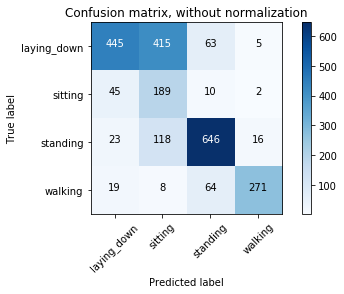

0.6631038905515177

In [30]:
args = []

fit_model_and_run_test('LogisticRegression', args, features, labels, test_features, test_labels)

## Run test for MLPClassifier

In [92]:
solver = 'lbfgs'
activations = ['logistic', 'tanh', 'relu']
n_hidden_units_1 = list(range(50,110,10))
n_hidden_units_2 = list(range(50,110,10))
# activations = ['relu']
# n_hidden_units_1 = [2,5]
# n_hidden_units_2 = [2,5]

best_accuracy = 0
best_args = []
best_args.append((0,0))
best_args.append('')
best_args.append('')

for act in activations:
    for nhu1 in n_hidden_units_1:
        for nhu2 in n_hidden_units_2:
            args = [(nhu1,nhu2), act, solver]
            print("Running: ", args)

            current_accuracy = fit_model_and_run_test('MLPClassifier', args, features, labels, test_features, test_labels, verbose=False)
            if current_accuracy > best_accuracy:
                best_accuracy = current_accuracy
                best_args[0] = (nhu1,nhu2)
                best_args[1] = act
                best_args[2] = solver
                print("Best Accuracy till now: ", best_accuracy)
                print("Best Args till now: ", best_args)


print("Best Accuracy: ", best_accuracy)
print("Best Args: ", best_args)

Running:  [(50, 50), 'logistic', 'lbfgs']
Best Accuracy till now:  0.5272655943507257
Best Args till now:  [(50, 50), 'logistic', 'lbfgs']
Running:  [(50, 60), 'logistic', 'lbfgs']
Best Accuracy till now:  0.5319733228717144
Best Args till now:  [(50, 60), 'logistic', 'lbfgs']
Running:  [(50, 70), 'logistic', 'lbfgs']
Best Accuracy till now:  0.5472734405649274
Best Args till now:  [(50, 70), 'logistic', 'lbfgs']
Running:  [(50, 80), 'logistic', 'lbfgs']
Best Accuracy till now:  0.5543350333464103
Best Args till now:  [(50, 80), 'logistic', 'lbfgs']
Running:  [(50, 90), 'logistic', 'lbfgs']
Running:  [(50, 100), 'logistic', 'lbfgs']
Best Accuracy till now:  0.5566888976069047
Best Args till now:  [(50, 100), 'logistic', 'lbfgs']
Running:  [(60, 50), 'logistic', 'lbfgs']
Running:  [(60, 60), 'logistic', 'lbfgs']
Running:  [(60, 70), 'logistic', 'lbfgs']
Running:  [(60, 80), 'logistic', 'lbfgs']
Best Accuracy till now:  0.5653197332287171
Best Args till now:  [(60, 80), 'logistic', 'lbfg

In [31]:
args = [(60, 80), 'logistic', 'lbfgs']

fit_model_and_run_test('MLPClassifier', args, features, labels, test_features, test_labels, verbose=False)

0.6549807610089782

## Run test for Decision Tree

In [94]:
criterion='gini'
max_features = list(range(1,50,1))

best_accuracy = 0
best_args = []
best_args.append(0)
best_args.append(criterion)

for nfeat in max_features:
    args = [nfeat, criterion]
    print("Running: ", args)

    current_accuracy = fit_model_and_run_test('DecisionTreeClassifier', args, features, labels, test_features, test_labels, verbose=False) 
    if current_accuracy > best_accuracy:
        best_accuracy = current_accuracy
        best_args[0] = nfeat
        best_args[1] = criterion
        print("Best Accuracy till now: ", best_accuracy)
        print("Best Args till now: ", best_args)


print("Best Accuracy: ", best_accuracy)
print("Best Args: ", best_args)

Running:  [1, 'gini']
Best Accuracy till now:  0.49666535896429975
Best Args till now:  [1, 'gini']
Running:  [2, 'gini']
Best Accuracy till now:  0.5319733228717144
Best Args till now:  [2, 'gini']
Running:  [3, 'gini']
Running:  [4, 'gini']
Best Accuracy till now:  0.5370733621027854
Best Args till now:  [4, 'gini']
Running:  [5, 'gini']
Running:  [6, 'gini']
Best Accuracy till now:  0.6084739113377795
Best Args till now:  [6, 'gini']
Running:  [7, 'gini']
Running:  [8, 'gini']
Running:  [9, 'gini']
Running:  [10, 'gini']
Running:  [11, 'gini']
Running:  [12, 'gini']
Running:  [13, 'gini']
Running:  [14, 'gini']
Running:  [15, 'gini']
Running:  [16, 'gini']
Running:  [17, 'gini']
Running:  [18, 'gini']
Running:  [19, 'gini']
Running:  [20, 'gini']
Running:  [21, 'gini']
Running:  [22, 'gini']
Running:  [23, 'gini']
Running:  [24, 'gini']
Running:  [25, 'gini']
Running:  [26, 'gini']
Running:  [27, 'gini']
Running:  [28, 'gini']
Running:  [29, 'gini']
Running:  [30, 'gini']
Running:  

In [32]:
args = [39, 'gini']

fit_model_and_run_test('DecisionTreeClassifier', args, features, labels, test_features, test_labels, verbose=False) 

0.5767421975203079

## Run test for Random Forest

In [95]:
criterion = 'gini'
n_estimators = list(range(10,55,5))
max_features = list(range(12,50,2))
max_depth = list(range(5,30,2 ))

best_accuracy = 0
best_args = []
best_args.append(0)
best_args.append(criterion)
best_args.append(0)
best_args.append(0)


for ne in n_estimators:
    for mf in max_features:
        for md in max_depth:
            args = [ne, criterion, mf, md]
            print("Running: ", args)

            current_accuracy = fit_model_and_run_test('RandomForestClassifier', args, features, labels, test_features, test_labels, verbose=False)
            if current_accuracy > best_accuracy:
                best_accuracy = current_accuracy
                best_args[0] = ne
                best_args[1] = criterion
                best_args[2] = mf
                best_args[3] = md
                
                print("Best Accuracy till now: ", best_accuracy)
                print("Best Args till now: ", best_args)


print("Best Accuracy: ", best_accuracy)
print("Best Args: ", best_args)



Running:  [10, 'gini', 12, 5]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Best Accuracy till now:  0.6371125931737937
Best Args till now:  [10, 'gini', 12, 5]
Running:  [10, 'gini', 12, 7]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Best Accuracy till now:  0.6465280502157709
Best Args till now:  [10, 'gini', 12, 7]
Running:  [10, 'gini', 12, 9]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [10, 'gini', 12, 11]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [10, 'gini', 12, 13]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [10, 'gini', 12, 15]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [10, 'gini', 12, 17]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [10, 'gini', 12, 19]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [10, 'gini', 12, 21]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [10, 'gini', 12, 23]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [10, 'gini', 12, 25]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [10, 'gini', 12, 27]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [10, 'gini', 12, 29]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [10, 'gini', 14, 5]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [10, 'gini', 14, 7]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [10, 'gini', 14, 9]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [10, 'gini', 14, 11]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [10, 'gini', 14, 13]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [10, 'gini', 14, 15]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [10, 'gini', 14, 17]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [10, 'gini', 14, 19]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [10, 'gini', 14, 21]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [10, 'gini', 14, 23]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [10, 'gini', 14, 25]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [10, 'gini', 14, 27]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [10, 'gini', 14, 29]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [10, 'gini', 16, 5]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [10, 'gini', 16, 7]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [10, 'gini', 16, 9]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [10, 'gini', 16, 11]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [10, 'gini', 16, 13]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [10, 'gini', 16, 15]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [10, 'gini', 16, 17]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [10, 'gini', 16, 19]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [10, 'gini', 16, 21]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [10, 'gini', 16, 23]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [10, 'gini', 16, 25]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [10, 'gini', 16, 27]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [10, 'gini', 16, 29]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [10, 'gini', 18, 5]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Best Accuracy till now:  0.6594743036484896
Best Args till now:  [10, 'gini', 18, 5]
Running:  [10, 'gini', 18, 7]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [10, 'gini', 18, 9]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [10, 'gini', 18, 11]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [10, 'gini', 18, 13]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [10, 'gini', 18, 15]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [10, 'gini', 18, 17]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [10, 'gini', 18, 19]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [10, 'gini', 18, 21]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [10, 'gini', 18, 23]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [10, 'gini', 18, 25]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [10, 'gini', 18, 27]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [10, 'gini', 18, 29]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [10, 'gini', 20, 5]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [10, 'gini', 20, 7]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [10, 'gini', 20, 9]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [10, 'gini', 20, 11]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [10, 'gini', 20, 13]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [10, 'gini', 20, 15]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [10, 'gini', 20, 17]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [10, 'gini', 20, 19]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [10, 'gini', 20, 21]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [10, 'gini', 20, 23]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [10, 'gini', 20, 25]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [10, 'gini', 20, 27]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [10, 'gini', 20, 29]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [10, 'gini', 22, 5]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [10, 'gini', 22, 7]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [10, 'gini', 22, 9]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [10, 'gini', 22, 11]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [10, 'gini', 22, 13]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [10, 'gini', 22, 15]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [10, 'gini', 22, 17]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [10, 'gini', 22, 19]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [10, 'gini', 22, 21]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [10, 'gini', 22, 23]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [10, 'gini', 22, 25]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [10, 'gini', 22, 27]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [10, 'gini', 22, 29]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [10, 'gini', 24, 5]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [10, 'gini', 24, 7]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [10, 'gini', 24, 9]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [10, 'gini', 24, 11]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [10, 'gini', 24, 13]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [10, 'gini', 24, 15]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [10, 'gini', 24, 17]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [10, 'gini', 24, 19]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [10, 'gini', 24, 21]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [10, 'gini', 24, 23]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [10, 'gini', 24, 25]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [10, 'gini', 24, 27]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [10, 'gini', 24, 29]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [10, 'gini', 26, 5]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [10, 'gini', 26, 7]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [10, 'gini', 26, 9]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [10, 'gini', 26, 11]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [10, 'gini', 26, 13]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [10, 'gini', 26, 15]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [10, 'gini', 26, 17]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [10, 'gini', 26, 19]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [10, 'gini', 26, 21]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [10, 'gini', 26, 23]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [10, 'gini', 26, 25]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [10, 'gini', 26, 27]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [10, 'gini', 26, 29]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [10, 'gini', 28, 5]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [10, 'gini', 28, 7]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [10, 'gini', 28, 9]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [10, 'gini', 28, 11]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [10, 'gini', 28, 13]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [10, 'gini', 28, 15]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [10, 'gini', 28, 17]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [10, 'gini', 28, 19]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [10, 'gini', 28, 21]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [10, 'gini', 28, 23]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [10, 'gini', 28, 25]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [10, 'gini', 28, 27]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [10, 'gini', 28, 29]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [10, 'gini', 30, 5]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [10, 'gini', 30, 7]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [10, 'gini', 30, 9]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [10, 'gini', 30, 11]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [10, 'gini', 30, 13]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [10, 'gini', 30, 15]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [10, 'gini', 30, 17]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [10, 'gini', 30, 19]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [10, 'gini', 30, 21]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [10, 'gini', 30, 23]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [10, 'gini', 30, 25]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [10, 'gini', 30, 27]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [10, 'gini', 30, 29]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [10, 'gini', 32, 5]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [10, 'gini', 32, 7]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [10, 'gini', 32, 9]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [10, 'gini', 32, 11]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [10, 'gini', 32, 13]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [10, 'gini', 32, 15]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [10, 'gini', 32, 17]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [10, 'gini', 32, 19]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [10, 'gini', 32, 21]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [10, 'gini', 32, 23]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [10, 'gini', 32, 25]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [10, 'gini', 32, 27]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [10, 'gini', 32, 29]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [10, 'gini', 34, 5]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [10, 'gini', 34, 7]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [10, 'gini', 34, 9]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [10, 'gini', 34, 11]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [10, 'gini', 34, 13]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [10, 'gini', 34, 15]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [10, 'gini', 34, 17]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [10, 'gini', 34, 19]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [10, 'gini', 34, 21]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [10, 'gini', 34, 23]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [10, 'gini', 34, 25]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [10, 'gini', 34, 27]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [10, 'gini', 34, 29]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [10, 'gini', 36, 5]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [10, 'gini', 36, 7]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [10, 'gini', 36, 9]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [10, 'gini', 36, 11]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [10, 'gini', 36, 13]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [10, 'gini', 36, 15]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [10, 'gini', 36, 17]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [10, 'gini', 36, 19]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [10, 'gini', 36, 21]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [10, 'gini', 36, 23]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [10, 'gini', 36, 25]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [10, 'gini', 36, 27]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [10, 'gini', 36, 29]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [10, 'gini', 38, 5]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [10, 'gini', 38, 7]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [10, 'gini', 38, 9]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [10, 'gini', 38, 11]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [10, 'gini', 38, 13]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [10, 'gini', 38, 15]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [10, 'gini', 38, 17]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [10, 'gini', 38, 19]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [10, 'gini', 38, 21]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [10, 'gini', 38, 23]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [10, 'gini', 38, 25]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [10, 'gini', 38, 27]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [10, 'gini', 38, 29]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [10, 'gini', 40, 5]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [10, 'gini', 40, 7]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [10, 'gini', 40, 9]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [10, 'gini', 40, 11]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [10, 'gini', 40, 13]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [10, 'gini', 40, 15]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [10, 'gini', 40, 17]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [10, 'gini', 40, 19]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [10, 'gini', 40, 21]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [10, 'gini', 40, 23]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [10, 'gini', 40, 25]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [10, 'gini', 40, 27]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [10, 'gini', 40, 29]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [10, 'gini', 42, 5]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [10, 'gini', 42, 7]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [10, 'gini', 42, 9]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [10, 'gini', 42, 11]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [10, 'gini', 42, 13]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [10, 'gini', 42, 15]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [10, 'gini', 42, 17]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [10, 'gini', 42, 19]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [10, 'gini', 42, 21]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [10, 'gini', 42, 23]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [10, 'gini', 42, 25]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [10, 'gini', 42, 27]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [10, 'gini', 42, 29]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [10, 'gini', 44, 5]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [10, 'gini', 44, 7]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [10, 'gini', 44, 9]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [10, 'gini', 44, 11]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [10, 'gini', 44, 13]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [10, 'gini', 44, 15]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [10, 'gini', 44, 17]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [10, 'gini', 44, 19]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [10, 'gini', 44, 21]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [10, 'gini', 44, 23]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [10, 'gini', 44, 25]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [10, 'gini', 44, 27]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [10, 'gini', 44, 29]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [10, 'gini', 46, 5]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [10, 'gini', 46, 7]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [10, 'gini', 46, 9]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [10, 'gini', 46, 11]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [10, 'gini', 46, 13]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [10, 'gini', 46, 15]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [10, 'gini', 46, 17]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [10, 'gini', 46, 19]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [10, 'gini', 46, 21]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [10, 'gini', 46, 23]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [10, 'gini', 46, 25]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [10, 'gini', 46, 27]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [10, 'gini', 46, 29]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [10, 'gini', 48, 5]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [10, 'gini', 48, 7]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [10, 'gini', 48, 9]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [10, 'gini', 48, 11]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [10, 'gini', 48, 13]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [10, 'gini', 48, 15]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [10, 'gini', 48, 17]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [10, 'gini', 48, 19]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [10, 'gini', 48, 21]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [10, 'gini', 48, 23]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [10, 'gini', 48, 25]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [10, 'gini', 48, 27]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [10, 'gini', 48, 29]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [15, 'gini', 12, 5]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [15, 'gini', 12, 7]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Best Accuracy till now:  0.6626127893291487
Best Args till now:  [15, 'gini', 12, 7]
Running:  [15, 'gini', 12, 9]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [15, 'gini', 12, 11]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [15, 'gini', 12, 13]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [15, 'gini', 12, 15]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [15, 'gini', 12, 17]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [15, 'gini', 12, 19]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [15, 'gini', 12, 21]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [15, 'gini', 12, 23]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [15, 'gini', 12, 25]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [15, 'gini', 12, 27]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [15, 'gini', 12, 29]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [15, 'gini', 14, 5]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [15, 'gini', 14, 7]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [15, 'gini', 14, 9]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [15, 'gini', 14, 11]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [15, 'gini', 14, 13]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [15, 'gini', 14, 15]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [15, 'gini', 14, 17]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [15, 'gini', 14, 19]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [15, 'gini', 14, 21]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [15, 'gini', 14, 23]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [15, 'gini', 14, 25]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [15, 'gini', 14, 27]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [15, 'gini', 14, 29]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [15, 'gini', 16, 5]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [15, 'gini', 16, 7]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [15, 'gini', 16, 9]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [15, 'gini', 16, 11]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [15, 'gini', 16, 13]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [15, 'gini', 16, 15]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [15, 'gini', 16, 17]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [15, 'gini', 16, 19]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [15, 'gini', 16, 21]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [15, 'gini', 16, 23]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [15, 'gini', 16, 25]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [15, 'gini', 16, 27]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [15, 'gini', 16, 29]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [15, 'gini', 18, 5]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [15, 'gini', 18, 7]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [15, 'gini', 18, 9]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [15, 'gini', 18, 11]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [15, 'gini', 18, 13]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [15, 'gini', 18, 15]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [15, 'gini', 18, 17]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [15, 'gini', 18, 19]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [15, 'gini', 18, 21]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [15, 'gini', 18, 23]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [15, 'gini', 18, 25]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [15, 'gini', 18, 27]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [15, 'gini', 18, 29]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [15, 'gini', 20, 5]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [15, 'gini', 20, 7]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [15, 'gini', 20, 9]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [15, 'gini', 20, 11]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [15, 'gini', 20, 13]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [15, 'gini', 20, 15]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [15, 'gini', 20, 17]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Best Accuracy till now:  0.6688897606904668
Best Args till now:  [15, 'gini', 20, 17]
Running:  [15, 'gini', 20, 19]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [15, 'gini', 20, 21]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [15, 'gini', 20, 23]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [15, 'gini', 20, 25]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [15, 'gini', 20, 27]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [15, 'gini', 20, 29]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [15, 'gini', 22, 5]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [15, 'gini', 22, 7]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [15, 'gini', 22, 9]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [15, 'gini', 22, 11]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [15, 'gini', 22, 13]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [15, 'gini', 22, 15]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [15, 'gini', 22, 17]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [15, 'gini', 22, 19]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [15, 'gini', 22, 21]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [15, 'gini', 22, 23]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [15, 'gini', 22, 25]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [15, 'gini', 22, 27]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [15, 'gini', 22, 29]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [15, 'gini', 24, 5]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [15, 'gini', 24, 7]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [15, 'gini', 24, 9]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [15, 'gini', 24, 11]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [15, 'gini', 24, 13]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [15, 'gini', 24, 15]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [15, 'gini', 24, 17]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [15, 'gini', 24, 19]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [15, 'gini', 24, 21]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [15, 'gini', 24, 23]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [15, 'gini', 24, 25]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [15, 'gini', 24, 27]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [15, 'gini', 24, 29]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [15, 'gini', 26, 5]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [15, 'gini', 26, 7]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [15, 'gini', 26, 9]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [15, 'gini', 26, 11]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [15, 'gini', 26, 13]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [15, 'gini', 26, 15]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [15, 'gini', 26, 17]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [15, 'gini', 26, 19]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [15, 'gini', 26, 21]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [15, 'gini', 26, 23]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [15, 'gini', 26, 25]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [15, 'gini', 26, 27]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [15, 'gini', 26, 29]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [15, 'gini', 28, 5]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [15, 'gini', 28, 7]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [15, 'gini', 28, 9]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [15, 'gini', 28, 11]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [15, 'gini', 28, 13]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [15, 'gini', 28, 15]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [15, 'gini', 28, 17]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [15, 'gini', 28, 19]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [15, 'gini', 28, 21]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [15, 'gini', 28, 23]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [15, 'gini', 28, 25]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [15, 'gini', 28, 27]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [15, 'gini', 28, 29]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [15, 'gini', 30, 5]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [15, 'gini', 30, 7]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [15, 'gini', 30, 9]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [15, 'gini', 30, 11]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [15, 'gini', 30, 13]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [15, 'gini', 30, 15]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [15, 'gini', 30, 17]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [15, 'gini', 30, 19]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [15, 'gini', 30, 21]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [15, 'gini', 30, 23]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [15, 'gini', 30, 25]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [15, 'gini', 30, 27]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [15, 'gini', 30, 29]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [15, 'gini', 32, 5]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [15, 'gini', 32, 7]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [15, 'gini', 32, 9]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [15, 'gini', 32, 11]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [15, 'gini', 32, 13]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [15, 'gini', 32, 15]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [15, 'gini', 32, 17]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [15, 'gini', 32, 19]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [15, 'gini', 32, 21]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Best Accuracy till now:  0.6759513534719498
Best Args till now:  [15, 'gini', 32, 21]
Running:  [15, 'gini', 32, 23]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [15, 'gini', 32, 25]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [15, 'gini', 32, 27]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [15, 'gini', 32, 29]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [15, 'gini', 34, 5]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [15, 'gini', 34, 7]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [15, 'gini', 34, 9]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [15, 'gini', 34, 11]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [15, 'gini', 34, 13]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [15, 'gini', 34, 15]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [15, 'gini', 34, 17]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [15, 'gini', 34, 19]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [15, 'gini', 34, 21]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [15, 'gini', 34, 23]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [15, 'gini', 34, 25]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [15, 'gini', 34, 27]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [15, 'gini', 34, 29]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [15, 'gini', 36, 5]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [15, 'gini', 36, 7]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [15, 'gini', 36, 9]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [15, 'gini', 36, 11]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [15, 'gini', 36, 13]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [15, 'gini', 36, 15]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [15, 'gini', 36, 17]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [15, 'gini', 36, 19]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [15, 'gini', 36, 21]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [15, 'gini', 36, 23]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [15, 'gini', 36, 25]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [15, 'gini', 36, 27]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [15, 'gini', 36, 29]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [15, 'gini', 38, 5]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [15, 'gini', 38, 7]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [15, 'gini', 38, 9]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [15, 'gini', 38, 11]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [15, 'gini', 38, 13]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [15, 'gini', 38, 15]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [15, 'gini', 38, 17]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [15, 'gini', 38, 19]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [15, 'gini', 38, 21]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [15, 'gini', 38, 23]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [15, 'gini', 38, 25]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [15, 'gini', 38, 27]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [15, 'gini', 38, 29]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [15, 'gini', 40, 5]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [15, 'gini', 40, 7]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [15, 'gini', 40, 9]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [15, 'gini', 40, 11]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [15, 'gini', 40, 13]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [15, 'gini', 40, 15]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [15, 'gini', 40, 17]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [15, 'gini', 40, 19]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [15, 'gini', 40, 21]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [15, 'gini', 40, 23]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [15, 'gini', 40, 25]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [15, 'gini', 40, 27]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [15, 'gini', 40, 29]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [15, 'gini', 42, 5]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [15, 'gini', 42, 7]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [15, 'gini', 42, 9]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [15, 'gini', 42, 11]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [15, 'gini', 42, 13]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [15, 'gini', 42, 15]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [15, 'gini', 42, 17]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [15, 'gini', 42, 19]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [15, 'gini', 42, 21]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [15, 'gini', 42, 23]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [15, 'gini', 42, 25]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [15, 'gini', 42, 27]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [15, 'gini', 42, 29]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [15, 'gini', 44, 5]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [15, 'gini', 44, 7]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [15, 'gini', 44, 9]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [15, 'gini', 44, 11]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [15, 'gini', 44, 13]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [15, 'gini', 44, 15]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [15, 'gini', 44, 17]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [15, 'gini', 44, 19]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [15, 'gini', 44, 21]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [15, 'gini', 44, 23]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [15, 'gini', 44, 25]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [15, 'gini', 44, 27]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [15, 'gini', 44, 29]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [15, 'gini', 46, 5]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [15, 'gini', 46, 7]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [15, 'gini', 46, 9]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [15, 'gini', 46, 11]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [15, 'gini', 46, 13]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [15, 'gini', 46, 15]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [15, 'gini', 46, 17]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [15, 'gini', 46, 19]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [15, 'gini', 46, 21]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [15, 'gini', 46, 23]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [15, 'gini', 46, 25]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [15, 'gini', 46, 27]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [15, 'gini', 46, 29]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [15, 'gini', 48, 5]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [15, 'gini', 48, 7]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [15, 'gini', 48, 9]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [15, 'gini', 48, 11]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [15, 'gini', 48, 13]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [15, 'gini', 48, 15]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [15, 'gini', 48, 17]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [15, 'gini', 48, 19]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [15, 'gini', 48, 21]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [15, 'gini', 48, 23]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [15, 'gini', 48, 25]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [15, 'gini', 48, 27]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [15, 'gini', 48, 29]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [20, 'gini', 12, 5]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [20, 'gini', 12, 7]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [20, 'gini', 12, 9]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [20, 'gini', 12, 11]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [20, 'gini', 12, 13]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [20, 'gini', 12, 15]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [20, 'gini', 12, 17]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [20, 'gini', 12, 19]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [20, 'gini', 12, 21]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [20, 'gini', 12, 23]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [20, 'gini', 12, 25]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [20, 'gini', 12, 27]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [20, 'gini', 12, 29]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [20, 'gini', 14, 5]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [20, 'gini', 14, 7]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [20, 'gini', 14, 9]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [20, 'gini', 14, 11]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [20, 'gini', 14, 13]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [20, 'gini', 14, 15]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [20, 'gini', 14, 17]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [20, 'gini', 14, 19]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [20, 'gini', 14, 21]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [20, 'gini', 14, 23]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [20, 'gini', 14, 25]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [20, 'gini', 14, 27]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [20, 'gini', 14, 29]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [20, 'gini', 16, 5]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [20, 'gini', 16, 7]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [20, 'gini', 16, 9]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [20, 'gini', 16, 11]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [20, 'gini', 16, 13]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [20, 'gini', 16, 15]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [20, 'gini', 16, 17]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [20, 'gini', 16, 19]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [20, 'gini', 16, 21]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [20, 'gini', 16, 23]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [20, 'gini', 16, 25]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [20, 'gini', 16, 27]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [20, 'gini', 16, 29]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [20, 'gini', 18, 5]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [20, 'gini', 18, 7]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [20, 'gini', 18, 9]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [20, 'gini', 18, 11]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [20, 'gini', 18, 13]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [20, 'gini', 18, 15]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [20, 'gini', 18, 17]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [20, 'gini', 18, 19]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [20, 'gini', 18, 21]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [20, 'gini', 18, 23]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [20, 'gini', 18, 25]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [20, 'gini', 18, 27]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [20, 'gini', 18, 29]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [20, 'gini', 20, 5]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [20, 'gini', 20, 7]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [20, 'gini', 20, 9]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [20, 'gini', 20, 11]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [20, 'gini', 20, 13]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [20, 'gini', 20, 15]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [20, 'gini', 20, 17]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [20, 'gini', 20, 19]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [20, 'gini', 20, 21]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [20, 'gini', 20, 23]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [20, 'gini', 20, 25]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [20, 'gini', 20, 27]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [20, 'gini', 20, 29]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [20, 'gini', 22, 5]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [20, 'gini', 22, 7]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [20, 'gini', 22, 9]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [20, 'gini', 22, 11]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [20, 'gini', 22, 13]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [20, 'gini', 22, 15]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [20, 'gini', 22, 17]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [20, 'gini', 22, 19]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [20, 'gini', 22, 21]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [20, 'gini', 22, 23]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [20, 'gini', 22, 25]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [20, 'gini', 22, 27]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [20, 'gini', 22, 29]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [20, 'gini', 24, 5]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [20, 'gini', 24, 7]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [20, 'gini', 24, 9]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [20, 'gini', 24, 11]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [20, 'gini', 24, 13]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [20, 'gini', 24, 15]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [20, 'gini', 24, 17]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [20, 'gini', 24, 19]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [20, 'gini', 24, 21]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [20, 'gini', 24, 23]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [20, 'gini', 24, 25]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [20, 'gini', 24, 27]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [20, 'gini', 24, 29]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [20, 'gini', 26, 5]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [20, 'gini', 26, 7]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [20, 'gini', 26, 9]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [20, 'gini', 26, 11]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [20, 'gini', 26, 13]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [20, 'gini', 26, 15]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [20, 'gini', 26, 17]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [20, 'gini', 26, 19]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [20, 'gini', 26, 21]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [20, 'gini', 26, 23]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [20, 'gini', 26, 25]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [20, 'gini', 26, 27]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [20, 'gini', 26, 29]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [20, 'gini', 28, 5]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [20, 'gini', 28, 7]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [20, 'gini', 28, 9]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [20, 'gini', 28, 11]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [20, 'gini', 28, 13]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [20, 'gini', 28, 15]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [20, 'gini', 28, 17]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [20, 'gini', 28, 19]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [20, 'gini', 28, 21]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [20, 'gini', 28, 23]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [20, 'gini', 28, 25]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [20, 'gini', 28, 27]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [20, 'gini', 28, 29]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [20, 'gini', 30, 5]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [20, 'gini', 30, 7]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [20, 'gini', 30, 9]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [20, 'gini', 30, 11]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [20, 'gini', 30, 13]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [20, 'gini', 30, 15]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [20, 'gini', 30, 17]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [20, 'gini', 30, 19]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [20, 'gini', 30, 21]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [20, 'gini', 30, 23]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [20, 'gini', 30, 25]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [20, 'gini', 30, 27]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [20, 'gini', 30, 29]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [20, 'gini', 32, 5]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [20, 'gini', 32, 7]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [20, 'gini', 32, 9]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [20, 'gini', 32, 11]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [20, 'gini', 32, 13]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [20, 'gini', 32, 15]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [20, 'gini', 32, 17]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [20, 'gini', 32, 19]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [20, 'gini', 32, 21]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [20, 'gini', 32, 23]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [20, 'gini', 32, 25]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [20, 'gini', 32, 27]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [20, 'gini', 32, 29]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [20, 'gini', 34, 5]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [20, 'gini', 34, 7]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [20, 'gini', 34, 9]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [20, 'gini', 34, 11]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [20, 'gini', 34, 13]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [20, 'gini', 34, 15]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [20, 'gini', 34, 17]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [20, 'gini', 34, 19]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [20, 'gini', 34, 21]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [20, 'gini', 34, 23]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [20, 'gini', 34, 25]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [20, 'gini', 34, 27]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [20, 'gini', 34, 29]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [20, 'gini', 36, 5]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [20, 'gini', 36, 7]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [20, 'gini', 36, 9]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [20, 'gini', 36, 11]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [20, 'gini', 36, 13]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [20, 'gini', 36, 15]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [20, 'gini', 36, 17]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [20, 'gini', 36, 19]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [20, 'gini', 36, 21]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [20, 'gini', 36, 23]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [20, 'gini', 36, 25]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [20, 'gini', 36, 27]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [20, 'gini', 36, 29]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [20, 'gini', 38, 5]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [20, 'gini', 38, 7]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [20, 'gini', 38, 9]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [20, 'gini', 38, 11]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [20, 'gini', 38, 13]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [20, 'gini', 38, 15]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [20, 'gini', 38, 17]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [20, 'gini', 38, 19]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [20, 'gini', 38, 21]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [20, 'gini', 38, 23]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [20, 'gini', 38, 25]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [20, 'gini', 38, 27]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [20, 'gini', 38, 29]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [20, 'gini', 40, 5]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [20, 'gini', 40, 7]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [20, 'gini', 40, 9]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [20, 'gini', 40, 11]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [20, 'gini', 40, 13]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [20, 'gini', 40, 15]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [20, 'gini', 40, 17]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [20, 'gini', 40, 19]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [20, 'gini', 40, 21]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [20, 'gini', 40, 23]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [20, 'gini', 40, 25]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [20, 'gini', 40, 27]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [20, 'gini', 40, 29]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [20, 'gini', 42, 5]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [20, 'gini', 42, 7]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [20, 'gini', 42, 9]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [20, 'gini', 42, 11]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [20, 'gini', 42, 13]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [20, 'gini', 42, 15]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [20, 'gini', 42, 17]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [20, 'gini', 42, 19]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [20, 'gini', 42, 21]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [20, 'gini', 42, 23]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [20, 'gini', 42, 25]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [20, 'gini', 42, 27]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [20, 'gini', 42, 29]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [20, 'gini', 44, 5]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [20, 'gini', 44, 7]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [20, 'gini', 44, 9]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [20, 'gini', 44, 11]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [20, 'gini', 44, 13]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [20, 'gini', 44, 15]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [20, 'gini', 44, 17]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [20, 'gini', 44, 19]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [20, 'gini', 44, 21]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [20, 'gini', 44, 23]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [20, 'gini', 44, 25]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [20, 'gini', 44, 27]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [20, 'gini', 44, 29]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [20, 'gini', 46, 5]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [20, 'gini', 46, 7]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [20, 'gini', 46, 9]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [20, 'gini', 46, 11]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [20, 'gini', 46, 13]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [20, 'gini', 46, 15]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [20, 'gini', 46, 17]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [20, 'gini', 46, 19]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [20, 'gini', 46, 21]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [20, 'gini', 46, 23]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [20, 'gini', 46, 25]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [20, 'gini', 46, 27]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [20, 'gini', 46, 29]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [20, 'gini', 48, 5]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [20, 'gini', 48, 7]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [20, 'gini', 48, 9]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [20, 'gini', 48, 11]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [20, 'gini', 48, 13]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [20, 'gini', 48, 15]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [20, 'gini', 48, 17]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [20, 'gini', 48, 19]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [20, 'gini', 48, 21]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [20, 'gini', 48, 23]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [20, 'gini', 48, 25]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [20, 'gini', 48, 27]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [20, 'gini', 48, 29]


c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Running:  [25, 'gini', 12, 5]
Running:  [25, 'gini', 12, 7]
Running:  [25, 'gini', 12, 9]
Running:  [25, 'gini', 12, 11]
Running:  [25, 'gini', 12, 13]
Running:  [25, 'gini', 12, 15]
Running:  [25, 'gini', 12, 17]
Running:  [25, 'gini', 12, 19]
Running:  [25, 'gini', 12, 21]
Running:  [25, 'gini', 12, 23]
Running:  [25, 'gini', 12, 25]
Running:  [25, 'gini', 12, 27]
Running:  [25, 'gini', 12, 29]
Running:  [25, 'gini', 14, 5]
Running:  [25, 'gini', 14, 7]
Running:  [25, 'gini', 14, 9]
Running:  [25, 'gini', 14, 11]
Running:  [25, 'gini', 14, 13]
Running:  [25, 'gini', 14, 15]
Running:  [25, 'gini', 14, 17]
Running:  [25, 'gini', 14, 19]
Running:  [25, 'gini', 14, 21]
Running:  [25, 'gini', 14, 23]
Running:  [25, 'gini', 14, 25]
Running:  [25, 'gini', 14, 27]
Running:  [25, 'gini', 14, 29]
Running:  [25, 'gini', 16, 5]
Running:  [25, 'gini', 16, 7]
Running:  [25, 'gini', 16, 9]
Running:  [25, 'gini', 16, 11]
Running:  [25, 'gini', 16, 13]
Running:  [25, 'gini', 16, 15]
Running:  [25, 'g

Running:  [30, 'gini', 14, 19]
Running:  [30, 'gini', 14, 21]
Running:  [30, 'gini', 14, 23]
Running:  [30, 'gini', 14, 25]
Running:  [30, 'gini', 14, 27]
Running:  [30, 'gini', 14, 29]
Running:  [30, 'gini', 16, 5]
Running:  [30, 'gini', 16, 7]
Running:  [30, 'gini', 16, 9]
Running:  [30, 'gini', 16, 11]
Running:  [30, 'gini', 16, 13]
Running:  [30, 'gini', 16, 15]
Running:  [30, 'gini', 16, 17]
Running:  [30, 'gini', 16, 19]
Running:  [30, 'gini', 16, 21]
Running:  [30, 'gini', 16, 23]
Running:  [30, 'gini', 16, 25]
Running:  [30, 'gini', 16, 27]
Running:  [30, 'gini', 16, 29]
Running:  [30, 'gini', 18, 5]
Running:  [30, 'gini', 18, 7]
Running:  [30, 'gini', 18, 9]
Running:  [30, 'gini', 18, 11]
Running:  [30, 'gini', 18, 13]
Running:  [30, 'gini', 18, 15]
Running:  [30, 'gini', 18, 17]
Running:  [30, 'gini', 18, 19]
Running:  [30, 'gini', 18, 21]
Running:  [30, 'gini', 18, 23]
Running:  [30, 'gini', 18, 25]
Running:  [30, 'gini', 18, 27]
Running:  [30, 'gini', 18, 29]
Running:  [30,

Running:  [35, 'gini', 18, 7]
Running:  [35, 'gini', 18, 9]
Running:  [35, 'gini', 18, 11]
Running:  [35, 'gini', 18, 13]
Running:  [35, 'gini', 18, 15]
Running:  [35, 'gini', 18, 17]
Running:  [35, 'gini', 18, 19]
Running:  [35, 'gini', 18, 21]
Running:  [35, 'gini', 18, 23]
Running:  [35, 'gini', 18, 25]
Running:  [35, 'gini', 18, 27]
Running:  [35, 'gini', 18, 29]
Running:  [35, 'gini', 20, 5]
Running:  [35, 'gini', 20, 7]
Running:  [35, 'gini', 20, 9]
Running:  [35, 'gini', 20, 11]
Running:  [35, 'gini', 20, 13]
Running:  [35, 'gini', 20, 15]
Running:  [35, 'gini', 20, 17]
Running:  [35, 'gini', 20, 19]
Running:  [35, 'gini', 20, 21]
Running:  [35, 'gini', 20, 23]
Running:  [35, 'gini', 20, 25]
Running:  [35, 'gini', 20, 27]
Running:  [35, 'gini', 20, 29]
Running:  [35, 'gini', 22, 5]
Running:  [35, 'gini', 22, 7]
Running:  [35, 'gini', 22, 9]
Running:  [35, 'gini', 22, 11]
Running:  [35, 'gini', 22, 13]
Running:  [35, 'gini', 22, 15]
Running:  [35, 'gini', 22, 17]
Running:  [35, '

Running:  [40, 'gini', 20, 21]
Running:  [40, 'gini', 20, 23]
Running:  [40, 'gini', 20, 25]
Running:  [40, 'gini', 20, 27]
Running:  [40, 'gini', 20, 29]
Running:  [40, 'gini', 22, 5]
Running:  [40, 'gini', 22, 7]
Running:  [40, 'gini', 22, 9]
Running:  [40, 'gini', 22, 11]
Running:  [40, 'gini', 22, 13]
Running:  [40, 'gini', 22, 15]
Running:  [40, 'gini', 22, 17]
Running:  [40, 'gini', 22, 19]
Running:  [40, 'gini', 22, 21]
Running:  [40, 'gini', 22, 23]
Running:  [40, 'gini', 22, 25]
Running:  [40, 'gini', 22, 27]
Running:  [40, 'gini', 22, 29]
Running:  [40, 'gini', 24, 5]
Running:  [40, 'gini', 24, 7]
Running:  [40, 'gini', 24, 9]
Running:  [40, 'gini', 24, 11]
Running:  [40, 'gini', 24, 13]
Running:  [40, 'gini', 24, 15]
Running:  [40, 'gini', 24, 17]
Running:  [40, 'gini', 24, 19]
Running:  [40, 'gini', 24, 21]
Running:  [40, 'gini', 24, 23]
Running:  [40, 'gini', 24, 25]
Running:  [40, 'gini', 24, 27]
Running:  [40, 'gini', 24, 29]
Running:  [40, 'gini', 26, 5]
Running:  [40, 

Running:  [45, 'gini', 22, 29]
Running:  [45, 'gini', 24, 5]
Running:  [45, 'gini', 24, 7]
Running:  [45, 'gini', 24, 9]
Running:  [45, 'gini', 24, 11]
Running:  [45, 'gini', 24, 13]
Running:  [45, 'gini', 24, 15]
Running:  [45, 'gini', 24, 17]
Running:  [45, 'gini', 24, 19]
Running:  [45, 'gini', 24, 21]
Running:  [45, 'gini', 24, 23]
Running:  [45, 'gini', 24, 25]
Running:  [45, 'gini', 24, 27]
Running:  [45, 'gini', 24, 29]
Running:  [45, 'gini', 26, 5]
Running:  [45, 'gini', 26, 7]
Running:  [45, 'gini', 26, 9]
Running:  [45, 'gini', 26, 11]
Running:  [45, 'gini', 26, 13]
Running:  [45, 'gini', 26, 15]
Running:  [45, 'gini', 26, 17]
Running:  [45, 'gini', 26, 19]
Running:  [45, 'gini', 26, 21]
Running:  [45, 'gini', 26, 23]
Running:  [45, 'gini', 26, 25]
Running:  [45, 'gini', 26, 27]
Running:  [45, 'gini', 26, 29]
Running:  [45, 'gini', 28, 5]
Running:  [45, 'gini', 28, 7]
Running:  [45, 'gini', 28, 9]
Running:  [45, 'gini', 28, 11]
Running:  [45, 'gini', 28, 13]
Running:  [45, 'g

Running:  [50, 'gini', 26, 17]
Running:  [50, 'gini', 26, 19]
Running:  [50, 'gini', 26, 21]
Running:  [50, 'gini', 26, 23]
Running:  [50, 'gini', 26, 25]
Running:  [50, 'gini', 26, 27]
Running:  [50, 'gini', 26, 29]
Running:  [50, 'gini', 28, 5]
Running:  [50, 'gini', 28, 7]
Running:  [50, 'gini', 28, 9]
Running:  [50, 'gini', 28, 11]
Running:  [50, 'gini', 28, 13]
Running:  [50, 'gini', 28, 15]
Running:  [50, 'gini', 28, 17]
Running:  [50, 'gini', 28, 19]
Running:  [50, 'gini', 28, 21]
Running:  [50, 'gini', 28, 23]
Running:  [50, 'gini', 28, 25]
Running:  [50, 'gini', 28, 27]
Running:  [50, 'gini', 28, 29]
Running:  [50, 'gini', 30, 5]
Running:  [50, 'gini', 30, 7]
Running:  [50, 'gini', 30, 9]
Running:  [50, 'gini', 30, 11]
Running:  [50, 'gini', 30, 13]
Running:  [50, 'gini', 30, 15]
Running:  [50, 'gini', 30, 17]
Running:  [50, 'gini', 30, 19]
Running:  [50, 'gini', 30, 21]
Running:  [50, 'gini', 30, 23]
Running:  [50, 'gini', 30, 25]
Running:  [50, 'gini', 30, 27]
Running:  [50,

In [35]:
args = [40, 'gini', 28, 11]

fit_model_and_run_test('RandomForestClassifier', args, features, labels, test_features, test_labels, verbose=False)

0.6468576314664386

In [51]:
args = [5]

fit_model_and_run_test('KNeighborsClassifier', args, features, labels, test_features, test_labels, verbose=False)

0.6378794356562634

In [54]:
args = ['rbf', 1.0, 'ovr']

fit_model_and_run_test('SVC', args, features, labels, test_features, test_labels, verbose=False)

0.6926036767849508